# Resumo do Trabalho

Neste trabalho será feita uma analise da variavel de classificação  sobre um dataset publico disponibilizado no kaggle, sobre status de pokémon, as hipoteses tem a haver com o tipo do pokémon, descobrir se é possivel predizer o tipo do pokemon com base nos seus status, e sobre ser lerdario, no caso se  é possivel classificar um pokemon sé é lendario ou não atraves das somas de status, e a relação de estatiticas entre si

# Sobre o Dataset

Dataset Publico cujo caracteristicas dos dados é ter todos os status dos pokémon, além de sua somatoria,Tendo o numéro da pokedex, tipagem princiapl e secundaria, sua geração se é lensario ou não, miticos estão sendo considerados como pokemon"normal",além de ter as mecanicas de mega evoclução e forma primal dos pokemon, com as suas novas tabela de status

O link<br>
https://www.kaggle.com/datasets/abcsds/pokemon/data

Licença:CC0: Public Domain<br>https://creativecommons.org/publicdomain/zero/1.0/

#Bibliotecas usadas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error,accuracy_score, classification_report,confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Pokemon.csv to Pokemon.csv


In [ ]:
df = pd.read_csv("/content/Pokemon.csv")

#EDA

Número total de linhas no dataset


In [ ]:
print(len(df.index))

800


Criando a paleta de cores dos tipos dos pokémon

In [ ]:
type_colors = [
    "#8ED752", "#F95643", "#53AFFE", "#C3D221", "#BBBDAF",
    "#AD5CA2", "#F8E64E", "#F0CA42", "#F9AEFE", "#A35449",
    "#FB61B4", "#CDBD72", "#7673DA", "#66EBFF", "#8B76FF",
    "#8E6856", "#C3C1D7", "#75A4F9"]

pokemon_types = df['Type 1'].unique()
pokemon_colors = dict(zip(pokemon_types, type_colors))

Esses valores nulos são os pokemon com 1 só tipo, não acho interessante preencher porque pode acarretar em resultantes erroneos

In [ ]:
df.isna().sum()

,0
#,0
Name,0
Type 1,0
Type 2,386
Total,0
HP,0
Attack,0
Defense,0
Sp. Atk,0
Sp. Def,0


Corrigindo, agrupando pokemon miticos como lendarios, alguns já foram agrupados pelo criador

In [ ]:
nomes = [
    "Mew",
    "Celebi",
    "Cresselia",
    "Phione",
    "Manaphy",
    "KeldeoOrdinary Forme",
    "KeldeoResolute Forme",
    "MeloettaAria Forme",
    "MeloettaPirouette Forme",
    "Genesect"
]

df.loc[df['Name'].isin(nomes), 'Legendary'] = True


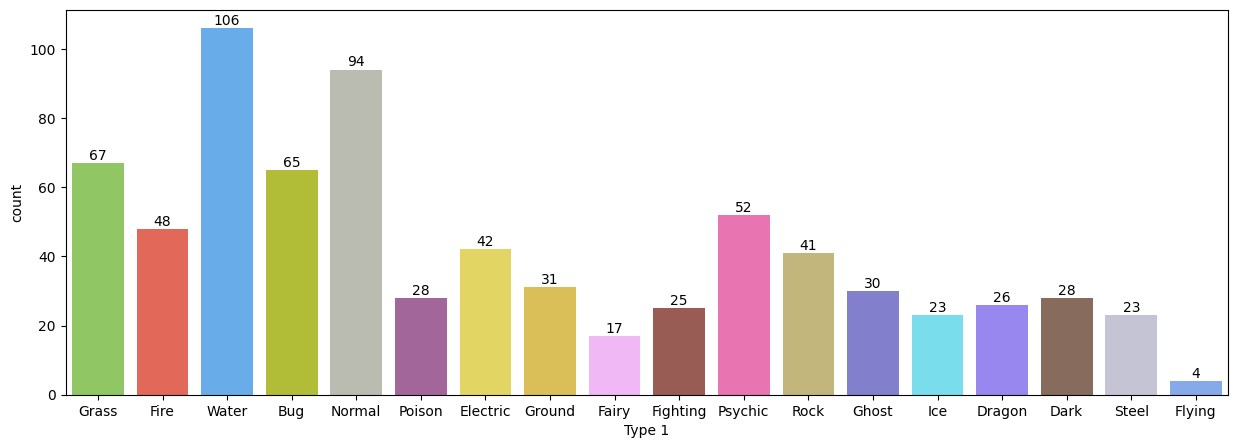

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data=df, x='Type 1',palette=pokemon_colors,hue="Type 1",legend=False)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,   # posição x
        height + 1,                    # posição y (um pouco acima)
        int(height),                   # texto (valor)
        ha='center'
    )

plt.show()


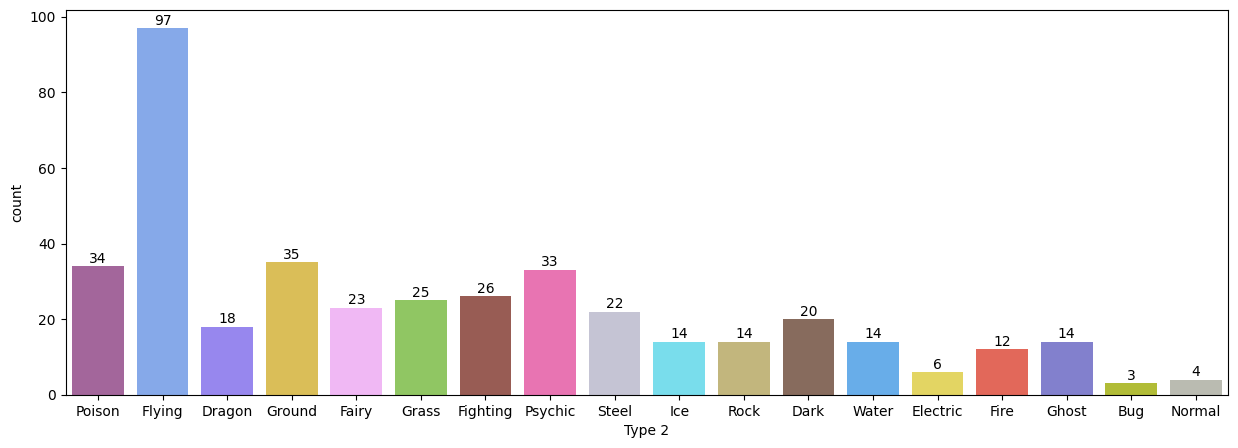

In [ ]:

plt.figure(figsize=(15,5))
ax = sns.countplot(data=df, x='Type 2',palette=pokemon_colors,hue="Type 2",legend=False)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,   # posição x
        height + 1,                    # posição y (um pouco acima)
        int(height),                   # texto (valor)
        ha='center'
    )

plt.show()


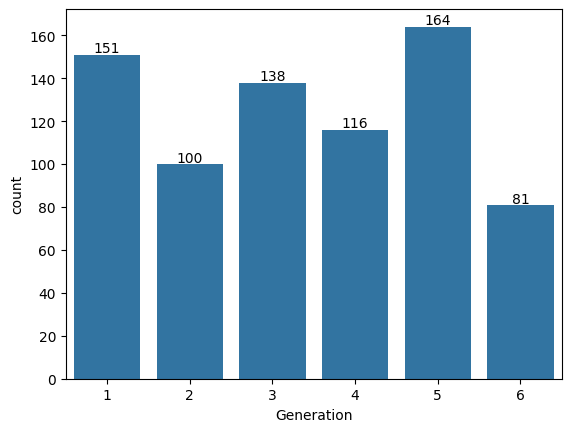

In [ ]:
ax=sns.countplot(df,x='Generation')

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,
        height + 1,
        int(height),
        ha='center'
    )

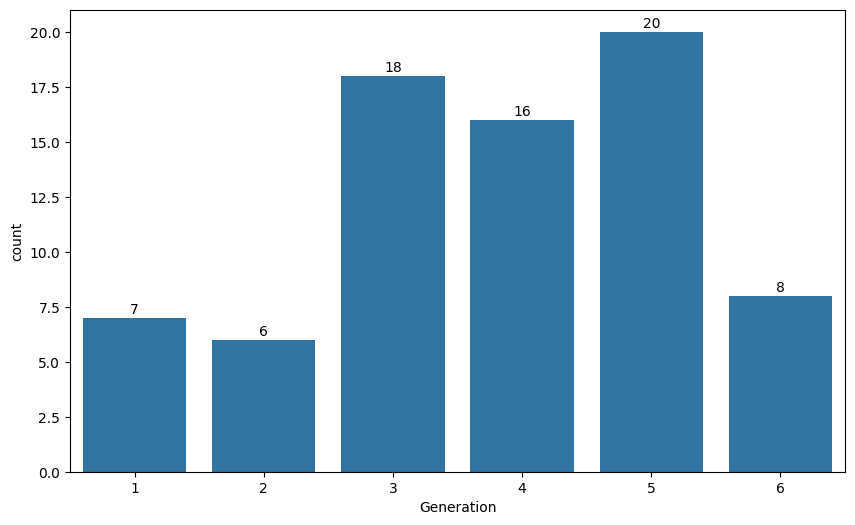

In [ ]:
df_legendary = df[df['Legendary']==True]


plt.figure(figsize=(10,6))
ax=sns.countplot(df_legendary,x='Generation')

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,
        height + 0.2,
        int(height),
        ha='center'
    )

HP_range
0-50       211
51-99      522
100–150     61
151–200      4
201–250      1
251–300      1
Name: count, dtype: int64


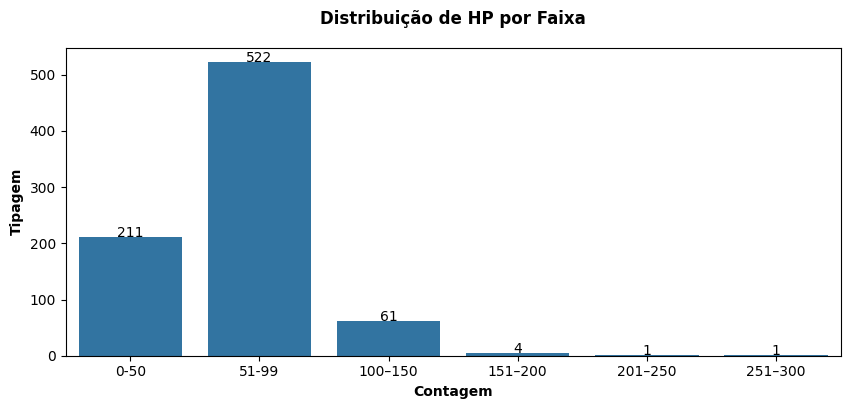

In [ ]:
df_stat= df.copy()

bins = [0,50,100, 150, 200, 250, 300]
labels = ['0-50','51-99','100–150', '151–200', '201–250', '251–300']

df_stat['HP_range'] = pd.cut(df['HP'], bins=bins, labels=labels, include_lowest=True)

hp_counts = df_stat['HP_range'].value_counts().sort_index()
print(hp_counts)

plt.figure(figsize=(10,4))
ax=sns.barplot(x=hp_counts.index, y=hp_counts.values)

ax.set_xlabel('Contagem', weight='bold')
ax.set_ylabel('Tipagem', weight='bold')
ax.set_title('Distribuição de HP por Faixa', weight='bold', y=1.05)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,
        height + 1,
        int(height),
        ha='center'
    )

Attack_range
0-50       170
51-99      460
100–150    152
151–200     18
Name: count, dtype: int64


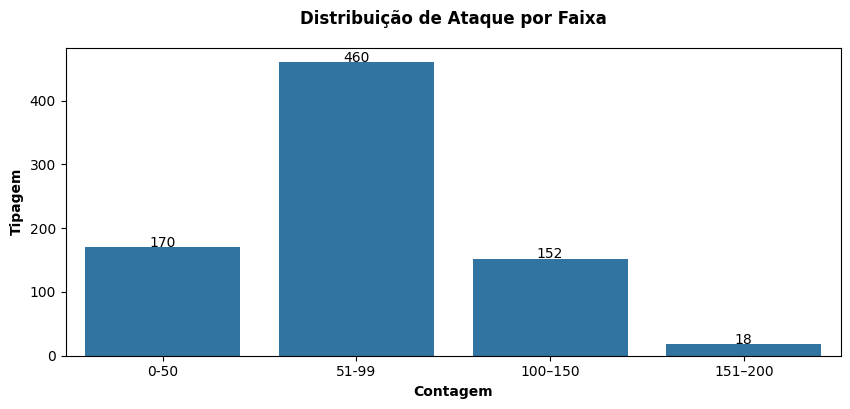

In [ ]:
df_stat= df.copy()

bins = [0,50,100, 150, 200]
labels = ['0-50','51-99','100–150', '151–200']

df_stat['Attack_range'] = pd.cut(df['Attack'], bins=bins, labels=labels, include_lowest=True)

Attack_counts = df_stat['Attack_range'].value_counts().sort_index()
print(Attack_counts)

plt.figure(figsize=(10,4))
ax=sns.barplot(x=Attack_counts.index, y=Attack_counts.values)

ax.set_xlabel('Contagem', weight='bold')
ax.set_ylabel('Tipagem', weight='bold')
ax.set_title('Distribuição de Ataque por Faixa', weight='bold', y=1.05)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,
        height + 1,
        int(height),
        ha='center'
    )


Defense_range
0-50       212
51-99      465
100–150    110
151–200     10
201–250      3
Name: count, dtype: int64


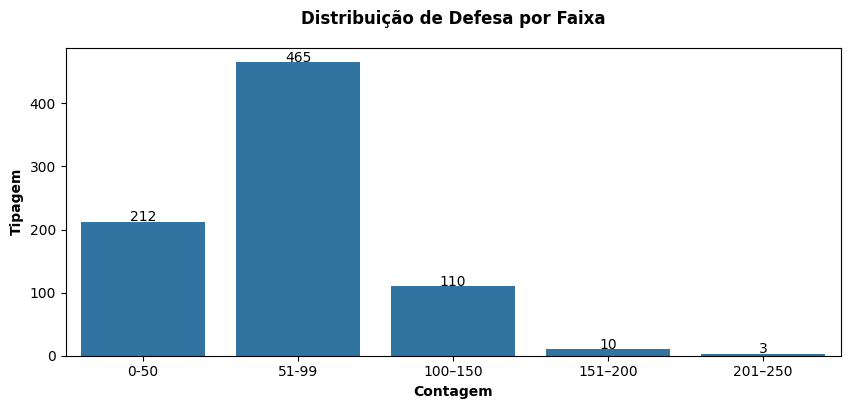

In [ ]:
df_stat= df.copy()

bins = [0,50,100, 150, 200, 250]
labels = ['0-50','51-99','100–150', '151–200', '201–250']

df_stat['Defense_range'] = pd.cut(df['Defense'], bins=bins, labels=labels, include_lowest=True)

Defense_counts = df_stat['Defense_range'].value_counts().sort_index()
print(Defense_counts)

plt.figure(figsize=(10,4))
ax=sns.barplot(x=Defense_counts.index, y=Defense_counts.values)

ax.set_xlabel('Contagem', weight='bold')
ax.set_ylabel('Tipagem', weight='bold')
ax.set_title('Distribuição de Defesa por Faixa', weight='bold', y=1.05)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,
        height + 1,
        int(height),
        ha='center'
    )


Sp.Atk_range
0-50       239
51-99      416
100–150    130
151–200     15
Name: count, dtype: int64


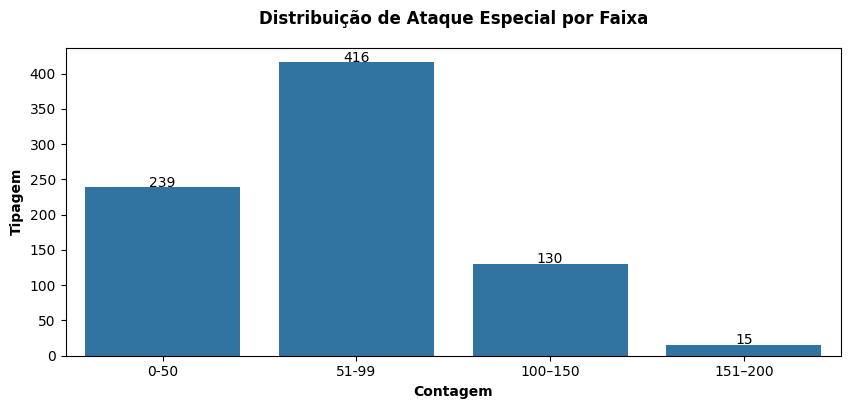

In [ ]:
df_stat= df.copy()
bins = [0,50,100, 150, 200]
labels = ['0-50','51-99','100–150', '151–200']

df_stat['Sp.Atk_range'] = pd.cut(df['Sp. Atk'], bins=bins, labels=labels, include_lowest=True)

SpAtk_counts = df_stat['Sp.Atk_range'].value_counts().sort_index()
print(SpAtk_counts)

plt.figure(figsize=(10,4))
ax=sns.barplot(x=SpAtk_counts.index, y=SpAtk_counts.values)

ax.set_xlabel('Contagem', weight='bold')
ax.set_ylabel('Tipagem', weight='bold')
ax.set_title('Distribuição de Ataque Especial por Faixa', weight='bold', y=1.05)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,
        height + 1,
        int(height),
        ha='center'
    )


Sp.Def_range
0-50       210
51-99      486
100–150     97
151–200      6
201–250      1
Name: count, dtype: int64


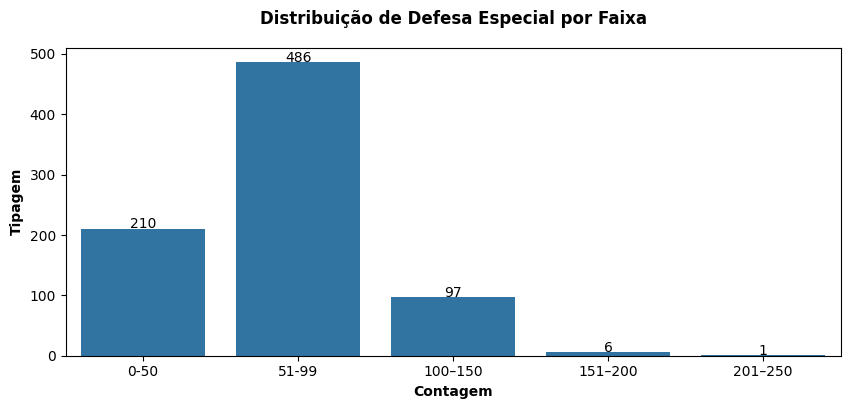

In [ ]:
df_stat= df.copy()
bins = [0,50,100, 150, 200, 250]
labels = ['0-50','51-99','100–150', '151–200', '201–250']

df_stat['Sp.Def_range'] = pd.cut(df_stat['Sp. Def'], bins=bins, labels=labels, include_lowest=True)

SpDef_counts = df_stat['Sp.Def_range'].value_counts().sort_index()
print(SpDef_counts)

plt.figure(figsize=(10,4))
ax=sns.barplot(x=SpDef_counts.index, y=SpDef_counts.values)

ax.set_xlabel('Contagem', weight='bold')
ax.set_ylabel('Tipagem', weight='bold')
ax.set_title('Distribuição de Defesa Especial por Faixa', weight='bold', y=1.05)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,
        height + 1,
        int(height),
        ha='center'
    )


Total_range
151–200     10
201-250     33
251-300     78
301-350    126
351-400     60
401-450     97
451-500    172
501-550    102
551-600     74
601-650     15
651-700     27
701-750      1
Name: count, dtype: int64


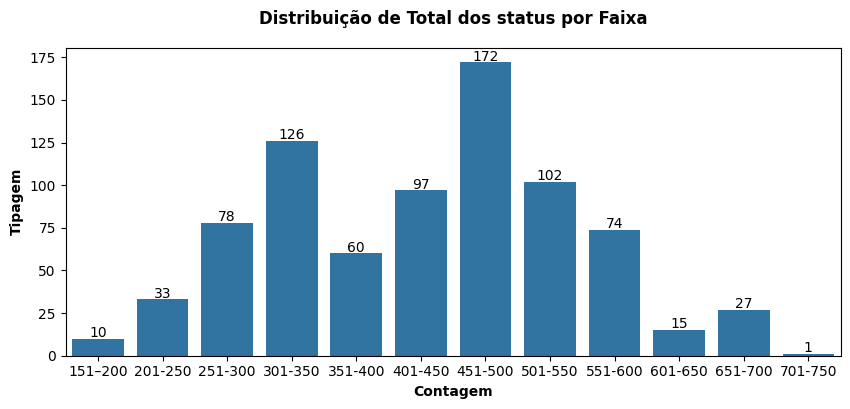

In [ ]:
df_stat= df.copy()
bins = [150, 200,250,300,350,400,450,500,550,600,650,700,750]
labels = ['151–200','201-250','251-300','301-350','351-400','401-450','451-500','501-550','551-600','601-650','651-700','701-750']

df_stat['Total_range'] = pd.cut(df_stat['Total'], bins=bins, labels=labels, include_lowest=True)

Total_counts = df_stat['Total_range'].value_counts().sort_index()
print(Total_counts)

plt.figure(figsize=(10,4))
ax=sns.barplot(x=Total_counts.index, y=Total_counts.values)

ax.set_xlabel('Contagem', weight='bold')
ax.set_ylabel('Tipagem', weight='bold')
ax.set_title('Distribuição de Total dos status por Faixa', weight='bold', y=1.05)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,
        height + 1,
        int(height),
        ha='center'
    )


# Fazendo  as analises tirando os pokémon da mecanica da mega evolução e forma primal

Retirando os pokemon mega e versões primais dos pokemon lendarios Groudon e Kyogre, pois eu quero trabalhar unicamente com os pokemon base, sem mecanicas

In [ ]:
df = df[~df['Name'].str.contains('Mega ')]

In [ ]:
df = df[~df['Name'].str.contains('Primal')]

In [ ]:
print(len(df.index))

750


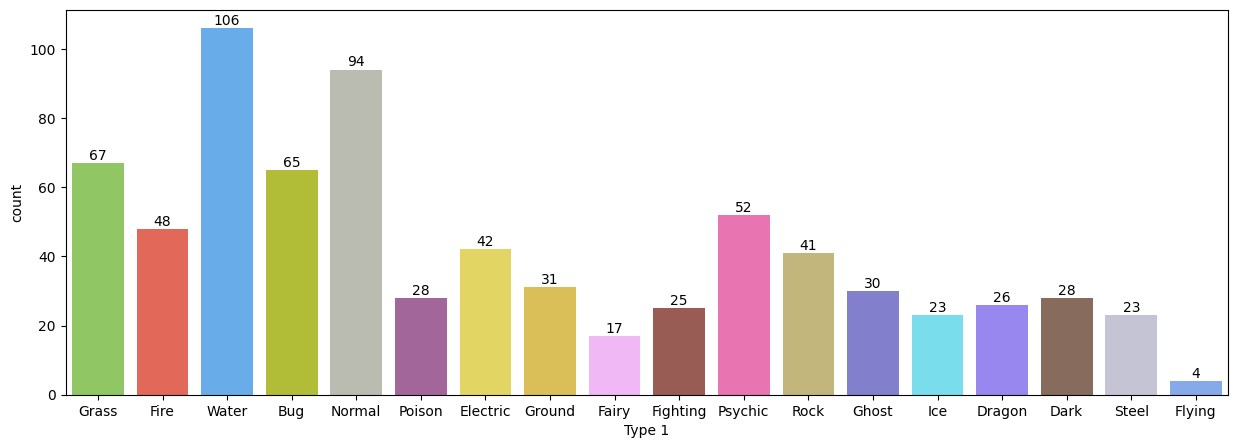

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data=df, x='Type 1',palette=pokemon_colors,hue="Type 1",legend=False)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,   # posição x
        height + 1,                    # posição y (um pouco acima)
        int(height),                   # texto (valor)
        ha='center'
    )

plt.show()


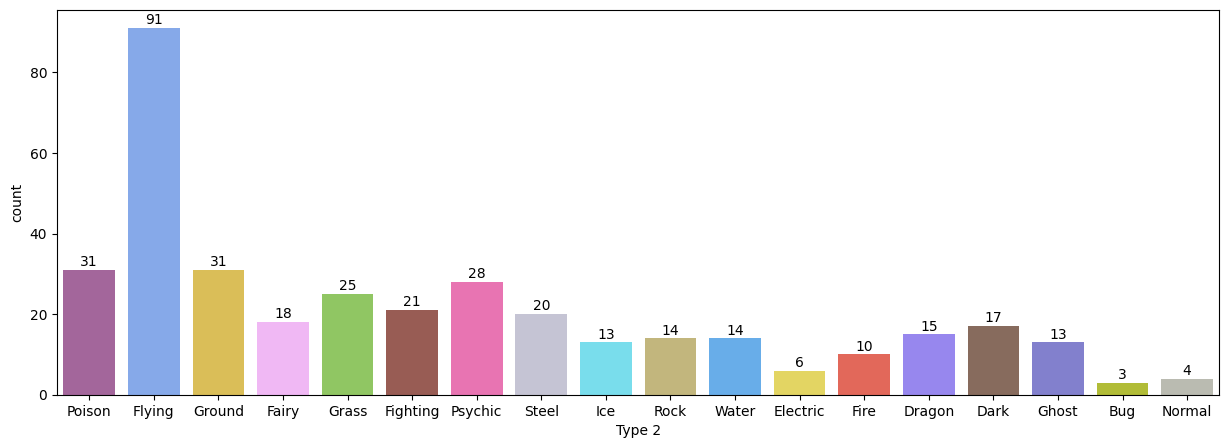

In [ ]:

plt.figure(figsize=(15,5))
ax = sns.countplot(data=df, x='Type 2',palette=pokemon_colors,hue="Type 2",legend=False)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,   # posição x
        height + 1,                    # posição y (um pouco acima)
        int(height),                   # texto (valor)
        ha='center'
    )

plt.show()


**Analise**<br>
Como podemos ver a tipagem 1 , ou seja a tipagem principal,tem um certo desequilibrio para 2 tipos, o normal e o de água,que possuem mais de 100 e a seugunda quase 100 especimes com essa tipahem como principal, mostrando que elas são bem comuns.Uma criosidade, o tipo normal, pelo menos nas gerações iniciais, eram mais usados para representar animais da vida real de forma veridica, normal, rattata,rato, pirgey, passaro,eevvee, raposa,assim por diante.<br> Em contrapartida no tipo secundario o voador que estava em ultimo no tipo principal é o tipo que mais é usado como auxiliar e onde o tipo água e normal diminuem bastante a quantidade


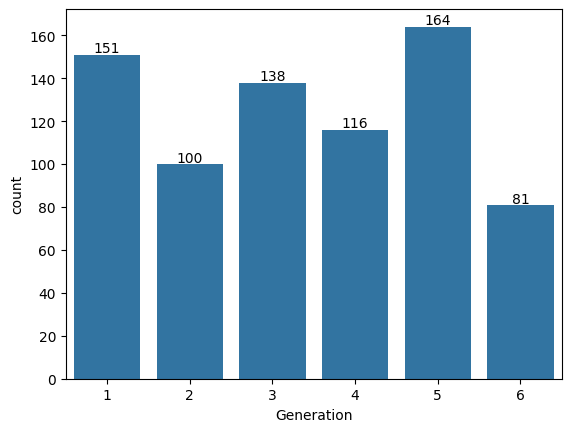

In [ ]:
ax=sns.countplot(df,x='Generation')

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,
        height + 1,
        int(height),
        ha='center'
    )

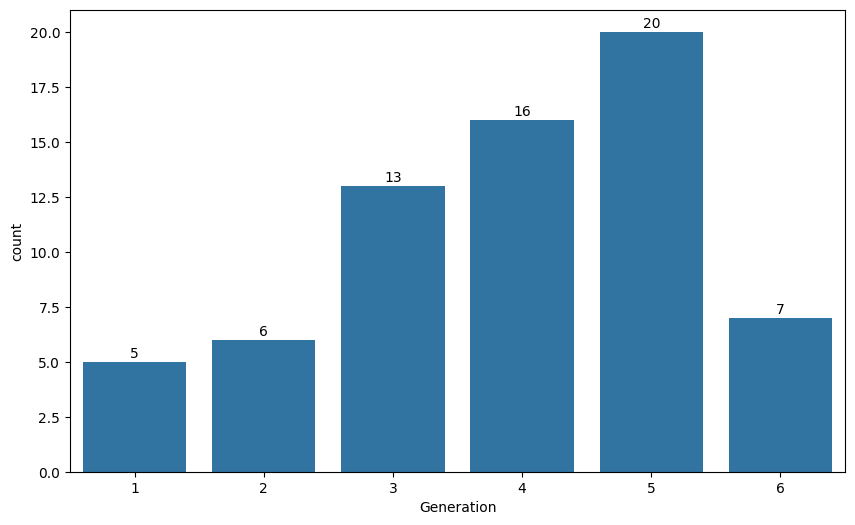

In [ ]:
df_legendary = df[df['Legendary']==True]


plt.figure(figsize=(10,6))
ax=sns.countplot(df_legendary,x='Generation')

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,
        height + 0.2,
        int(height),
        ha='center'
    )

HP_range
0-50       208
51-99      481
100–150     55
151–200      4
201–250      1
251–300      1
Name: count, dtype: int64


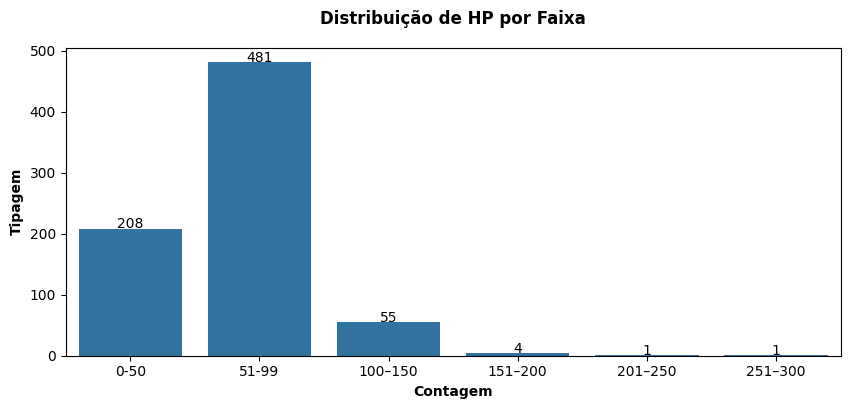

In [ ]:
df_stat= df.copy()

bins = [0,50,100, 150, 200, 250, 300]
labels = ['0-50','51-99','100–150', '151–200', '201–250', '251–300']

df_stat['HP_range'] = pd.cut(df['HP'], bins=bins, labels=labels, include_lowest=True)

hp_counts = df_stat['HP_range'].value_counts().sort_index()
print(hp_counts)

plt.figure(figsize=(10,4))
ax=sns.barplot(x=hp_counts.index, y=hp_counts.values)

ax.set_xlabel('Contagem', weight='bold')
ax.set_ylabel('Tipagem', weight='bold')
ax.set_title('Distribuição de HP por Faixa', weight='bold', y=1.05)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,
        height + 1,
        int(height),
        ha='center'
    )

Attack_range
0-50       169
51-99      448
100–150    127
151–200      6
Name: count, dtype: int64


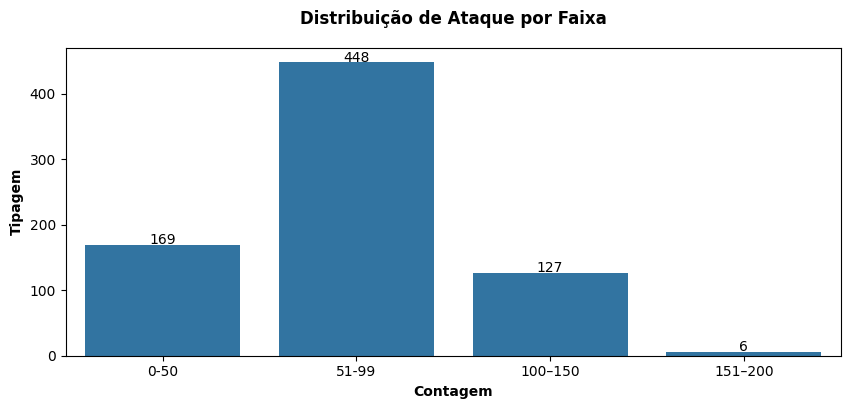

In [ ]:
df_stat= df.copy()

bins = [0,50,100, 150, 200]
labels = ['0-50','51-99','100–150', '151–200']

df_stat['Attack_range'] = pd.cut(df['Attack'], bins=bins, labels=labels, include_lowest=True)

Attack_counts = df_stat['Attack_range'].value_counts().sort_index()
print(Attack_counts)

plt.figure(figsize=(10,4))
ax=sns.barplot(x=Attack_counts.index, y=Attack_counts.values)

ax.set_xlabel('Contagem', weight='bold')
ax.set_ylabel('Tipagem', weight='bold')
ax.set_title('Distribuição de Ataque por Faixa', weight='bold', y=1.05)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,
        height + 1,
        int(height),
        ha='center'
    )


Defense_range
0-50       211
51-99      440
100–150     90
151–200      8
201–250      1
Name: count, dtype: int64


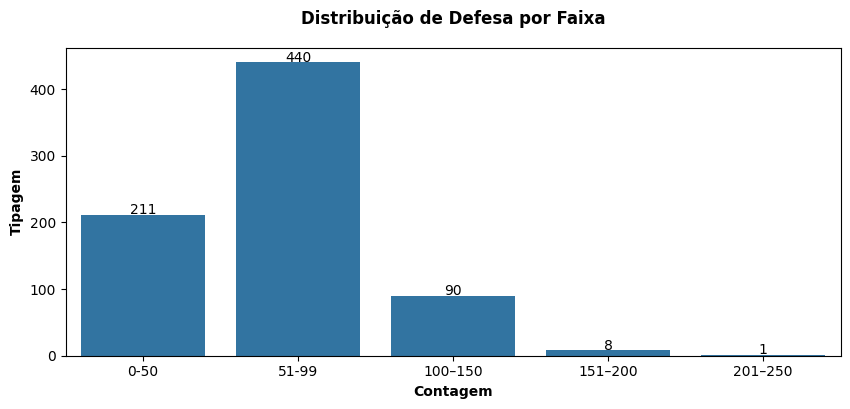

In [ ]:
df_stat= df.copy()

bins = [0,50,100, 150, 200, 250]
labels = ['0-50','51-99','100–150', '151–200', '201–250']

df_stat['Defense_range'] = pd.cut(df['Defense'], bins=bins, labels=labels, include_lowest=True)

Defense_counts = df_stat['Defense_range'].value_counts().sort_index()
print(Defense_counts)

plt.figure(figsize=(10,4))
ax=sns.barplot(x=Defense_counts.index, y=Defense_counts.values)

ax.set_xlabel('Contagem', weight='bold')
ax.set_ylabel('Tipagem', weight='bold')
ax.set_title('Distribuição de Defesa por Faixa', weight='bold', y=1.05)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,
        height + 1,
        int(height),
        ha='center'
    )


Sp.Atk_range
0-50       237
51-99      400
100–150    109
151–200      4
Name: count, dtype: int64


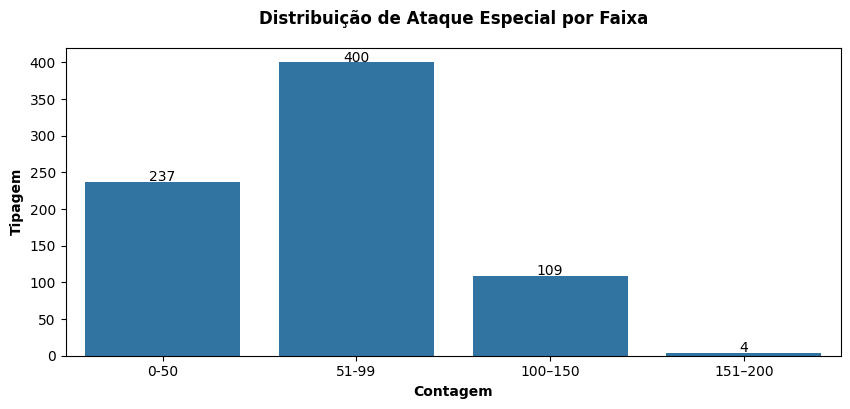

In [ ]:
df_stat= df.copy()
bins = [0,50,100, 150, 200]
labels = ['0-50','51-99','100–150', '151–200']

df_stat['Sp.Atk_range'] = pd.cut(df['Sp. Atk'], bins=bins, labels=labels, include_lowest=True)

SpAtk_counts = df_stat['Sp.Atk_range'].value_counts().sort_index()
print(SpAtk_counts)

plt.figure(figsize=(10,4))
ax=sns.barplot(x=SpAtk_counts.index, y=SpAtk_counts.values)

ax.set_xlabel('Contagem', weight='bold')
ax.set_ylabel('Tipagem', weight='bold')
ax.set_title('Distribuição de Ataque Especial por Faixa', weight='bold', y=1.05)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,
        height + 1,
        int(height),
        ha='center'
    )


Sp.Def_range
0-50       210
51-99      457
100–150     77
151–200      5
201–250      1
Name: count, dtype: int64


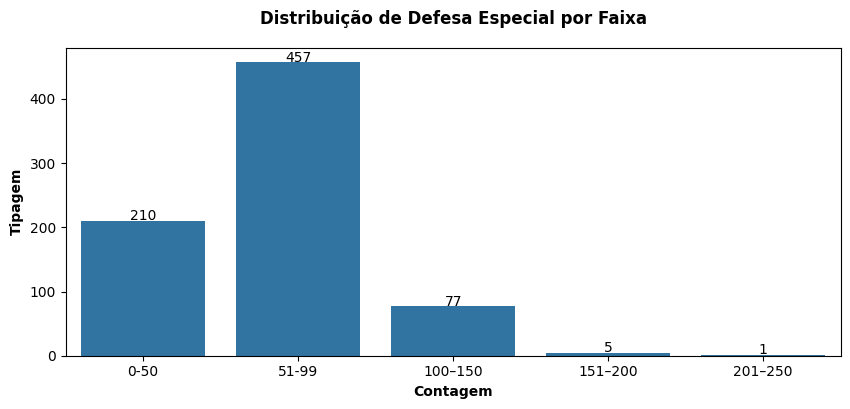

In [ ]:
df_stat= df.copy()
bins = [0,50,100, 150, 200, 250]
labels = ['0-50','51-99','100–150', '151–200', '201–250']

df_stat['Sp.Def_range'] = pd.cut(df_stat['Sp. Def'], bins=bins, labels=labels, include_lowest=True)

SpDef_counts = df_stat['Sp.Def_range'].value_counts().sort_index()
print(SpDef_counts)

plt.figure(figsize=(10,4))
ax=sns.barplot(x=SpDef_counts.index, y=SpDef_counts.values)

ax.set_xlabel('Contagem', weight='bold')
ax.set_ylabel('Tipagem', weight='bold')
ax.set_title('Distribuição de Defesa Especial por Faixa', weight='bold', y=1.05)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,
        height + 1,
        int(height),
        ha='center'
    )


Speed_range
0-50       254
51-99      412
100–150     82
151–200      2
Name: count, dtype: int64


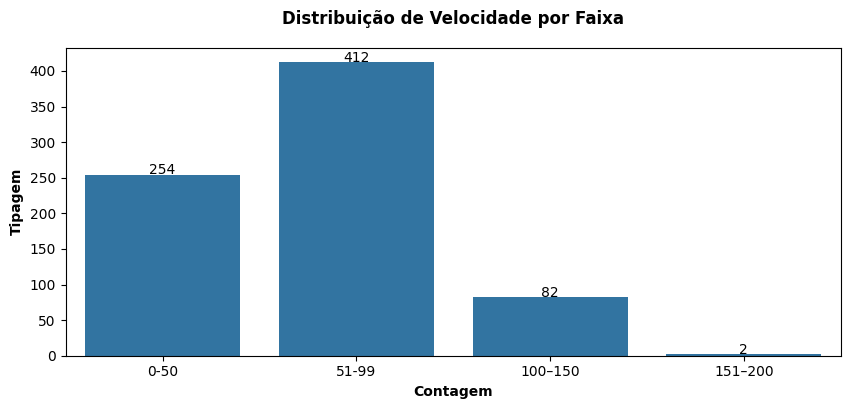

In [ ]:
df_stat= df.copy()
bins = [0,50,100, 150, 200]
labels = ['0-50','51-99','100–150', '151–200']

df_stat['Speed_range'] = pd.cut(df_stat['Speed'], bins=bins, labels=labels, include_lowest=True)

Speed_counts = df_stat['Speed_range'].value_counts().sort_index()
print(Speed_counts)


plt.figure(figsize=(10,4))
ax=sns.barplot(x=Speed_counts.index, y=Speed_counts.values)

ax.set_xlabel('Contagem', weight='bold')
ax.set_ylabel('Tipagem', weight='bold')
ax.set_title('Distribuição de Velocidade por Faixa', weight='bold', y=1.05)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,
        height + 1,
        int(height),
        ha='center'
    )

**Analise**<br>
É possivel perceber que nos pokemon o a um certo padrão em relação aos status, muitos não passam nem de seus 100 de status em seus atributos, essa análse pode ser feita do presuposto que existe muitos pokemon com linhas evilutivas e as linhas primarias ou intermediarias tender ter status medianos, mas quando chegam ao estagio final tendem a ter pelo menos 1 dos seus status passando do 100, esses pokemon que possuem status passando nos 100, o qu enão é algo tão fácil, tendem a ser mais utilizados no competitivo

Total_range
151–200     10
201-250     33
251-300     78
301-350    126
351-400     60
401-450     97
451-500    169
501-550    100
551-600     56
601-650      0
651-700     20
701-750      1
Name: count, dtype: int64


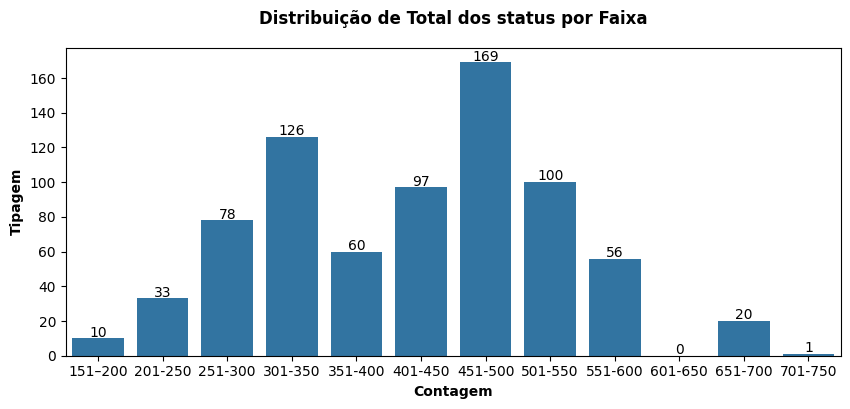

In [ ]:
df_stat= df.copy()
bins = [150, 200,250,300,350,400,450,500,550,600,650,700,750]
labels = ['151–200','201-250','251-300','301-350','351-400','401-450','451-500','501-550','551-600','601-650','651-700','701-750']

df_stat['Total_range'] = pd.cut(df_stat['Total'], bins=bins, labels=labels, include_lowest=True)

Total_counts = df_stat['Total_range'].value_counts().sort_index()
print(Total_counts)

plt.figure(figsize=(10,4))
ax=sns.barplot(x=Total_counts.index, y=Total_counts.values)

ax.set_xlabel('Contagem', weight='bold')
ax.set_ylabel('Tipagem', weight='bold')
ax.set_title('Distribuição de Total dos status por Faixa', weight='bold', y=1.05)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,
        height + 1,
        int(height),
        ha='center'
    )


**Analise**<br>
É possivel perceber que nos pokemon existe um certo equilibrio de onde fica o total de seus status, onde a maioria é entre 450 a 500,os pokeon abaixo disso ou são linhas intermediarias ou são pokemon gfracos com status baixos e quase não são usados em batalha competitiva.<br>
Porém já os pokémon com mais de 500 de status eles tendem a ser mais usados, e dentro desse esquema possuem lendarios, com status naturalmente mais altos, e ainda mais acime disso existem pokémon ,muito usados no competitivo, que não são lendarios mais possuem suas somas de status com 600 ou mais, eles são chamados pela comunidade de pseudo-lendarios, justamente peo totalde status em equivalente a de um lendario.


--- T-Test (Lendário vs Não Lendário Total) ---
T-statistic: 28.4097, P-value: 4.2678e-49
Média Legendary Total: 626.95
Média Não-Legendary Total: 406.13



Text(0.5, 1.0, 'Distribuição de Status Total: Lendários vs Não-Lendários')

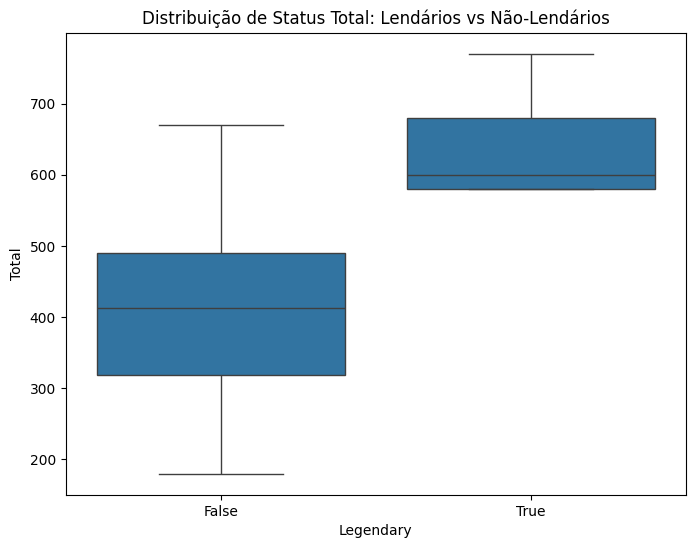

In [ ]:
legendary = df[df['Legendary'] == True]['Total']
non_legendary = df[df['Legendary'] == False]['Total']

# Perform T-test
t_stat, p_val_ttest = stats.ttest_ind(legendary, non_legendary, equal_var=False) # Welch's t-test


print(f"\n--- T-Test (Lendário vs Não Lendário Total) ---")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_val_ttest:.4e}")
print(f"Média Legendary Total: {legendary.mean():.2f}")
print(f"Média Não-Legendary Total: {non_legendary.mean():.2f}\n")

plt.figure(figsize=(8, 6))
sns.boxplot(x='Legendary', y='Total', data=df)
plt.title('Distribuição de Status Total: Lendários vs Não-Lendários')

**Analise**<br>
Vendo a analise do T-test, o qual analisou as medias dos status dos lendarios e nçao lendarios, vendo o valor de p=9.3580e-47, é notrorio perceber que Lendarios tendem a ter status mais elevados que pokemon normais.

Insight<br>
Com a media dos status dos lendarios sendo mais de 200 acima dos pokemon normal, por isso que quando competições que deixar a utilização de lendarios muitos, se não todos, os competidores utilizam um em seu time ,pois matematicamente um pokémon que tem status tão elevados te deixa com uma chance de vitoria mais alta do que não usar. Essa  desporoporção também é a causa dos lendarios serem banidos ou serem limitados a apenas 1 por time nos campeonatos.


--- ANOVA (Type 1 vs Attack) ---
F-statistic: 6.0041, P-value: 3.8892e-13



Text(0.5, 1.0, 'Distribuição de Ataque por Tipo Primário')

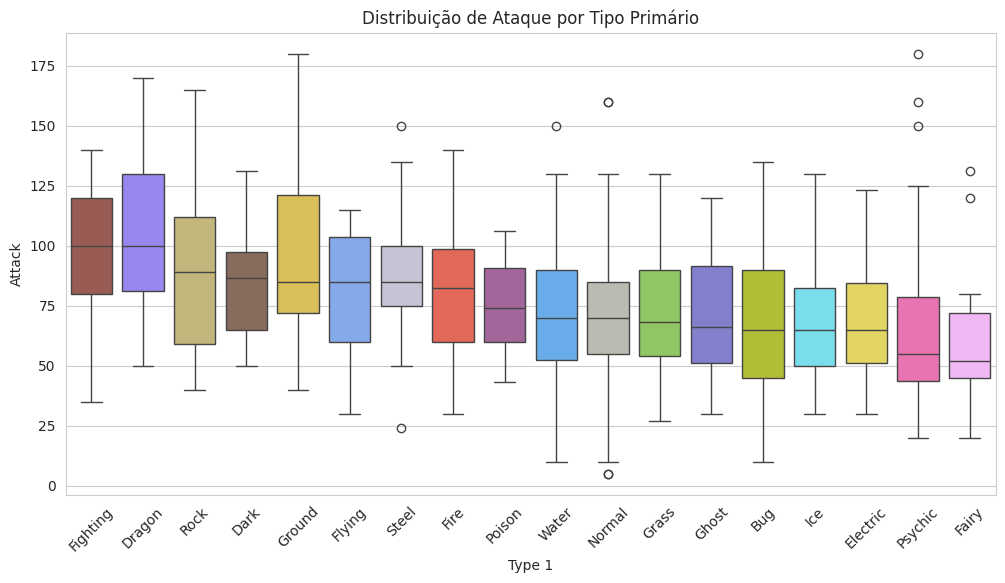

In [ ]:
types = df['Type 1'].unique()
type_groups = [df[df['Type 1'] == t]['Attack'] for t in types]

f_stat, p_val_anova = stats.f_oneway(*type_groups)


print(f"\n--- ANOVA (Type 1 vs Attack) ---")
print(f"F-statistic: {f_stat:.4f}, P-value: {p_val_anova:.4e}\n")
order = df.groupby('Type 1')['Attack'].median().sort_values(ascending=False).index
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type 1', y='Attack', data=df, order=order,palette = pokemon_colors,hue="Type 1")
plt.xticks(rotation=45)
plt.title('Distribuição de Ataque por Tipo Primário')

**Analise** <br>
É possivel perceber que certos tipos de pokémon tem suas medianas mais altas, ou seja tendem a ser mais fortes do lado fisico do que do lado especial do que outro,s um exemplo disso é o tipo lutador ou pedra e o o tipo eletrico e psicquico, onde no qual os 2 primeiros tem a mediana do status de ataque fisico  que os 2 ultimo, ou sejam se enfretam um  tipo pedra ou lutador tendem a enfretar um pokemon que ira usar ataques do tipo fisico enquanto se for do tipo psiquico ou fada eles vão tender mais para o lado especial

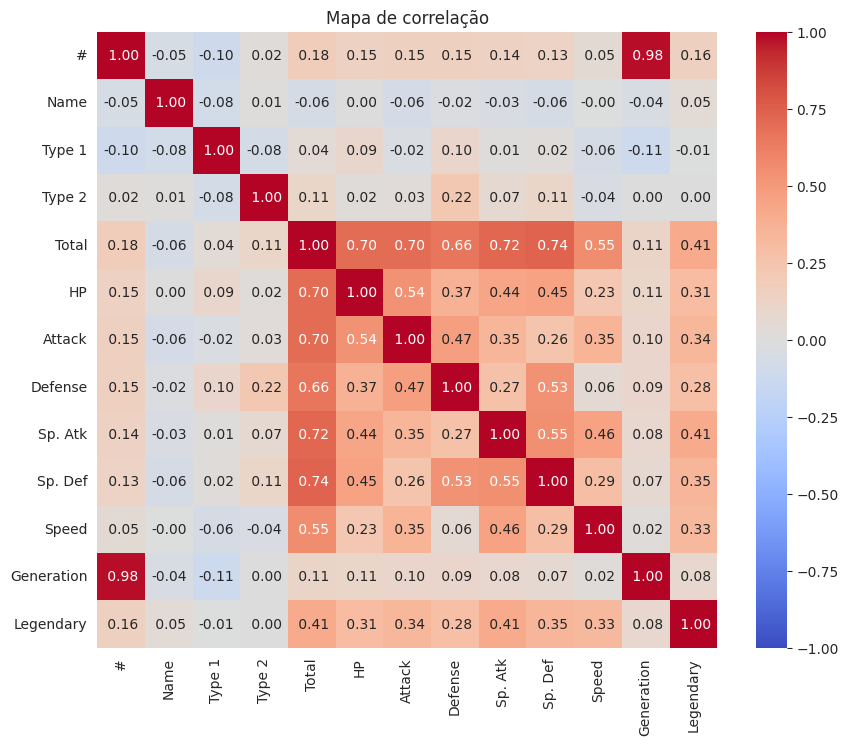

In [ ]:
df_num = df.copy()

for col in df_num.columns:
    df_num[col] = df_num[col].astype("category").cat.codes

correlacao = df_num.corr()
plt.figure(figsize=(10,8))
plt.title("Mapa de correlação")
sns.heatmap(correlacao, vmin=-1, vmax=1, annot=True,cmap="coolwarm",fmt=" .2f")
plt.show()

Text(0.5, 1.0, 'Mapa de Correlação dos Status')

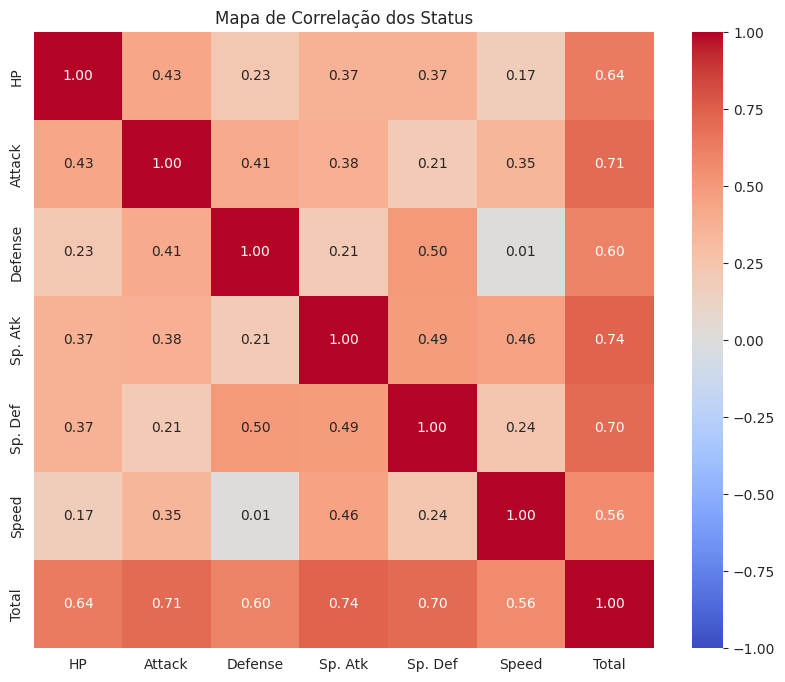

In [ ]:
plt.figure(figsize=(10, 8))
corr_matrix = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Total']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title('Mapa de Correlação dos Status')

Trade-offs de Status

É possivel notar algumas coisas nesse mapa de correlações  algumas caracterisitcas, como por exemplo velocidade e e defesa não combinam, ou seja  um pokemon rápido tende a ser frafil na defesa fisica, pokemon tanques tender a ter as duas defesas, fisica e especial altas e um pokemon forte no Ataque especial tende a ter uma defesa especial alta também

Insight

Ou seja, se tiver que enfrentam um pokemon forte na defesa fisica assuma que ele tenha uma defesa especial media para alta também,sendo bem dificil derrota-lo sem lear em conta fraqueza ou condições negativas, por outro lado se tiver um pokemon rápido a  tendencia é ele ser fragil, ou seja se você suporta ao ataque dele, que na maioria dos casos é alta visto que a corelação de speed tanto com ataque fisico quanto especial são altas, voce pode derrota-lo com um golpe, principalmente se for super efetivo

#Hipoteses

## Hipótese 1

 Um tipo  de pokemon tende a uma status especifico, exemplo um tipo eletreico tende  a ter o stat mais alto como o Sp. Attack?

### Dados relevantes para a Hipotese

Text(0.5, 1.0, 'Média dos Status por Tipo Principal')

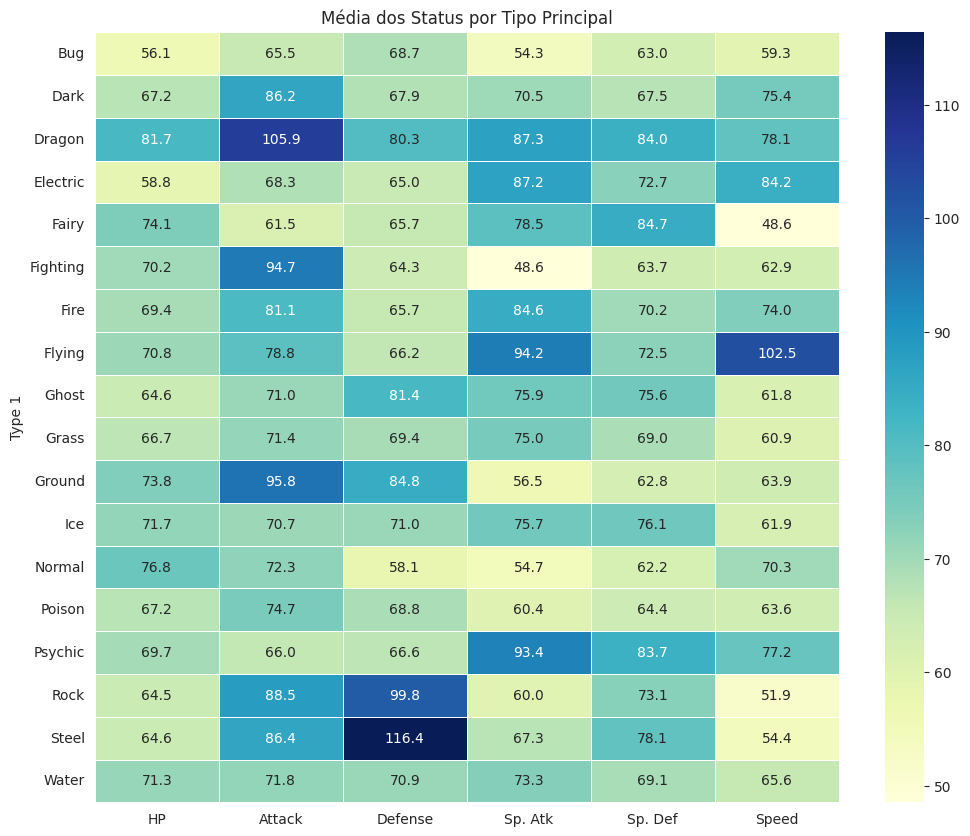

In [ ]:
# Lista dos status
stats_cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

# agrupa para os 2 tipos
type_stats = df.groupby('Type 1')[stats_cols].mean()

# 1. Heatmap visualization
plt.figure(figsize=(12, 10))
sns.heatmap(type_stats, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)
plt.title('Média dos Status por Tipo Principal')



In [ ]:
#move-se pelas colunas, le todas as colunas de cada linha
resultado_tipos = type_stats.agg(['idxmax', 'max'], axis=1)
#move-se pelas linhas le todas aslinhas de cada coluna
resultado_tipos_2 = type_stats.agg(['idxmax', 'max'], axis=0).T #Transpor, transforma linha em coluna e vice e versa


print("Status mais forte por Tipo:")
print(resultado_tipos)
print("\nTipo mais forte por Status:")
print("\n",resultado_tipos_2)

Status mais forte por Tipo:
           idxmax         max
Type 1                       
Bug       Defense   68.692308
Dark       Attack       86.25
Dragon     Attack  105.884615
Electric  Sp. Atk   87.166667
Fairy     Sp. Def   84.705882
Fighting   Attack       94.72
Fire      Sp. Atk   84.645833
Flying      Speed       102.5
Ghost     Defense   81.433333
Grass     Sp. Atk   75.014925
Ground     Attack       95.75
Ice       Sp. Def   76.130435
Normal         HP   76.776596
Poison     Attack   74.678571
Psychic   Sp. Atk   93.384615
Rock      Defense   99.756098
Steel     Defense  116.391304
Water     Sp. Atk   73.261682

Tipo mais forte por Status:

          idxmax         max
HP       Dragon   81.653846
Attack   Dragon  105.884615
Defense   Steel  116.391304
Sp. Atk  Flying       94.25
Sp. Def   Fairy   84.705882
Speed    Flying       102.5


**Analise**<br>
Conseguimos perceber que os tipos de pokemon tendem a ter certos atributos mais altos, como por exemplo o tipo psiquico focar no Sp.attack, voador na velocidade, com isso podemos notar um certo padrão, e outra analise notada é que de maneira geral o tipo dragão tem os maiores medias de status por tipo

### Fazendo a previsão

### Regressão logistica

In [ ]:
df_reg = df.copy()

# Criando as variáveis extras que descobrimos serem úteis
df_reg['Phys_vs_Spec'] = df_reg['Attack'] - df_reg['Sp. Atk']
df_reg['Def_vs_SpDef'] = df_reg['Defense'] - df_reg['Sp. Def']
df_reg['Speed_Share'] = df_reg['Speed'] / df_reg['Total']
df_reg['Is_Legendary'] = df_reg['Legendary'].map(int)

# Codificando o Type 2 (Transformando texto em número)
df_reg['Type 2_Filled'] = df_reg['Type 2'].fillna('None')
le = LabelEncoder()
df_reg['Type 2_Encoded'] = le.fit_transform(df_reg['Type 2_Filled'])

# 2. Selecionar as Colunas
features = [
    'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Total',
    'Generation', 'Is_Legendary',
    'Phys_vs_Spec', 'Def_vs_SpDef', 'Speed_Share',
    'Type 2_Encoded'
]

X = df_reg[features]
y = df_reg['Type 1'] # O que queremos prever

# 3. Separar Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. PADRONIZAÇÃO (Passo Obrigatório para Regressão Logística)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Criar e Treinar o Modelo
# 'multinomial': Pois temos mais de 2 tipos de pokemon
# 'max_iter=5000': Dá mais tempo para o modelo encontrar a matemática correta
log_reg = LogisticRegression(solver='lbfgs',
                             max_iter=5000,
                             class_weight='balanced',
                             random_state=42)

log_reg.fit(X_train_scaled, y_train)

# 6. Ver o Resultado
y_pred = log_reg.predict(X_test_scaled)
accuracy_reg = accuracy_score(y_test, y_pred)

print(f"Acurácia da Regressão Logística: {accuracy_reg:.2%}")

Acurácia da Regressão Logística: 16.89%


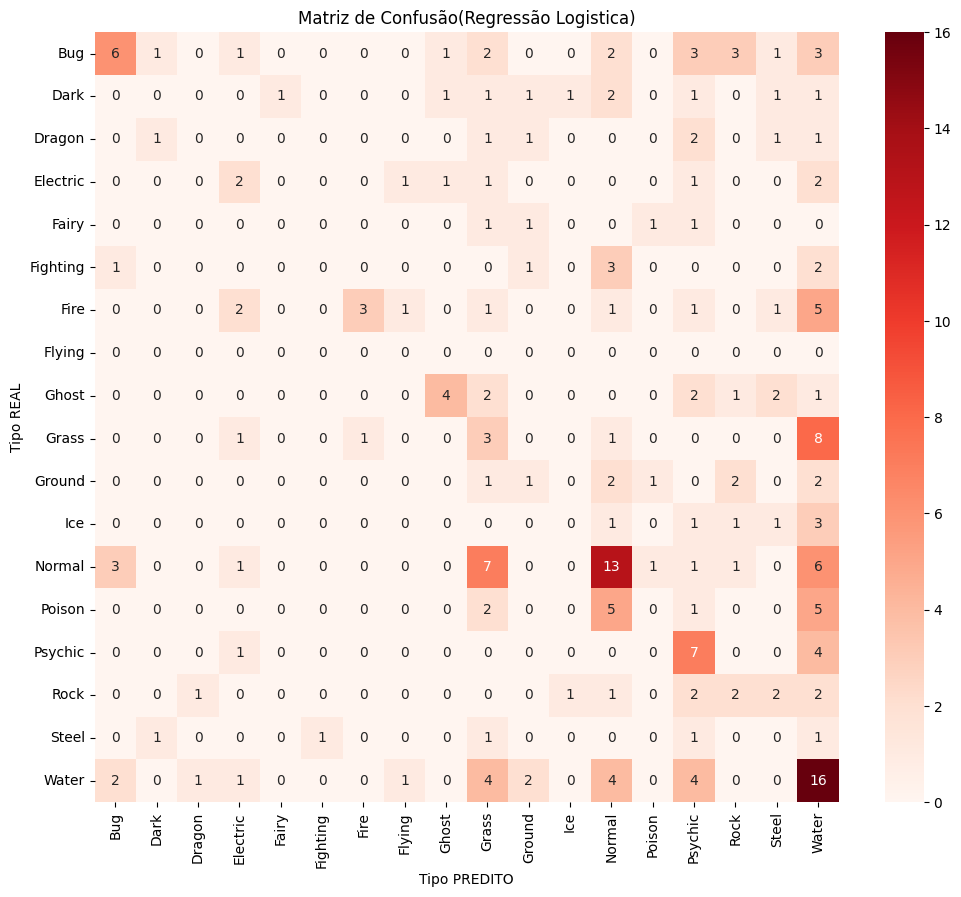

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds',
            xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)

plt.title('Matriz de Confusão(Regressão Logistica)')
plt.ylabel('Tipo REAL')
plt.xlabel('Tipo PREDITO')
plt.show()

**Resultado =** Deu Uma porcentagem baixa, menos de 20% porquê a regressão logística tenta traçar linhas retas para separar os tipos. porem não existe um padrão dos pokémon ,ou seja, não podem ser separados facilmente por linhas retas.

### Melhorando o Modelo

#### Tentativa 1: Usando  o ramdom forest

In [ ]:
#Criando as sfeatures
df_pred = df.copy()
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
X = df_pred[features]
y = df_pred['Type 1']

#treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar e treinar o modelo (Random Forest)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Prever
y_pred = clf.predict(X_test)

# Avaliar
accuracy_rf = accuracy_score(y_test, y_pred)
print(f"Acurácia : {accuracy_rf:.2%}")

# Mostrar o relatório completo
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, zero_division=0))

Acurácia : 20.44%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bug       0.27      0.17      0.21        23
        Dark       0.17      0.10      0.12        10
      Dragon       0.00      0.00      0.00         7
    Electric       0.27      0.38      0.32         8
       Fairy       0.00      0.00      0.00         4
    Fighting       0.14      0.14      0.14         7
        Fire       0.33      0.27      0.30        15
      Flying       0.00      0.00      0.00         0
       Ghost       0.60      0.25      0.35        12
       Grass       0.04      0.07      0.05        14
      Ground       0.11      0.11      0.11         9
         Ice       0.00      0.00      0.00         7
      Normal       0.38      0.45      0.42        33
      Poison       0.00      0.00      0.00        13
     Psychic       0.28      0.42      0.33        12
        Rock       0.08      0.09      0.08        11
       Steel       0.00      0.00 

Text(0, 0.5, 'Status')

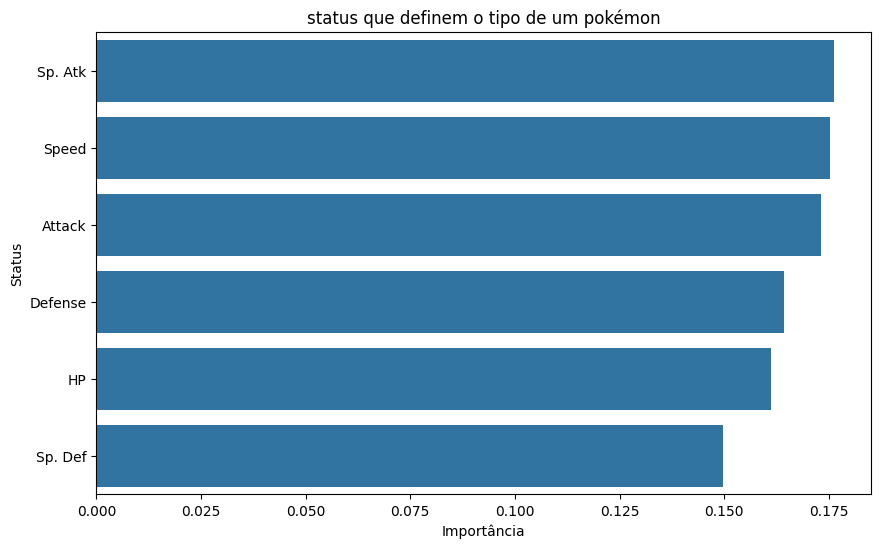

In [ ]:
#vizualização em um grafico de quais são os status que mais fazem a tender em um tipo
feature_imp = pd.Series(clf.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("status que definem o tipo de um pokémon")
plt.xlabel("Importância")
plt.ylabel("Status")



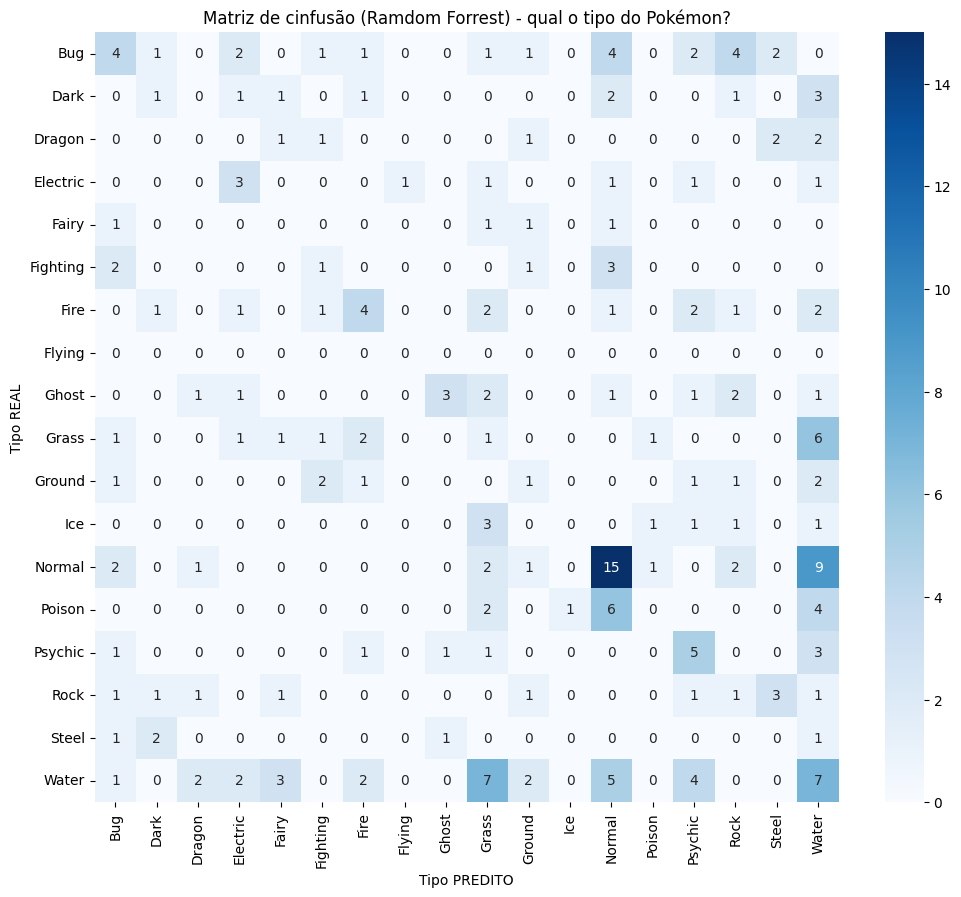

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=clf.classes_, yticklabels=clf.classes_)

plt.title('Matriz de cinfusão (Ramdom Forrest) - qual o tipo do Pokémon?')
plt.ylabel('Tipo REAL')
plt.xlabel('Tipo PREDITO')
plt.show()

**Resposta =** O resultado foi ruim, não teve um número alto de acerto,entretanto teve um resultado melhor que a regressçao logistica, um aumento de quase 5%,pois o random forest possuim a diferença de não segiur uma linha reta e sim um caminho mais sinuoso, gerando uma pesquisa interna por precisão maior

#### Tentativa 2:Usando Gradient Boosting, junção de variaveis fracas

In [ ]:
# Converter Legendary para número (0 ou 1)
df_dupla_pred = df.copy()
df_dupla_pred['Is_Legendary'] = df_dupla_pred['Legendary'].map(int)

# Diferença entre Ataque Físico e Especial (Define se é atacante fisico ou especial)
df_dupla_pred['Phys_vs_Spec'] = df_dupla_pred['Attack'] - df_dupla_pred['Sp. Atk']

# Diferença entre Defesa Física e Especial (Define se é Tanque Físico ou Tanque Especial)
df_dupla_pred['Def_vs_SpDef'] = df_dupla_pred['Defense'] - df_dupla_pred['Sp. Def']

# Proporção de Velocidade (O quão rápido ele é em relação ao total de força)
df_dupla_pred['Speed_Share'] = df_dupla_pred['Speed'] / df_dupla_pred['Total']

# Selecionar as colunas novas + antigas
features_enhanced = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed',
                     'Total', 'Generation', 'Is_Legendary', 'Phys_vs_Spec', 'Def_vs_SpDef', 'Speed_Share']

X = df_dupla_pred[features_enhanced]
y = df_dupla_pred['Type 1']

# 4. Treinar Modelo (Gradient Boosting)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred)

print(f"Acurácia com Novas Features e Gradient Boosting: {accuracy_gb:.2%}")

Acurácia com Novas Features e Gradient Boosting: 25.33%


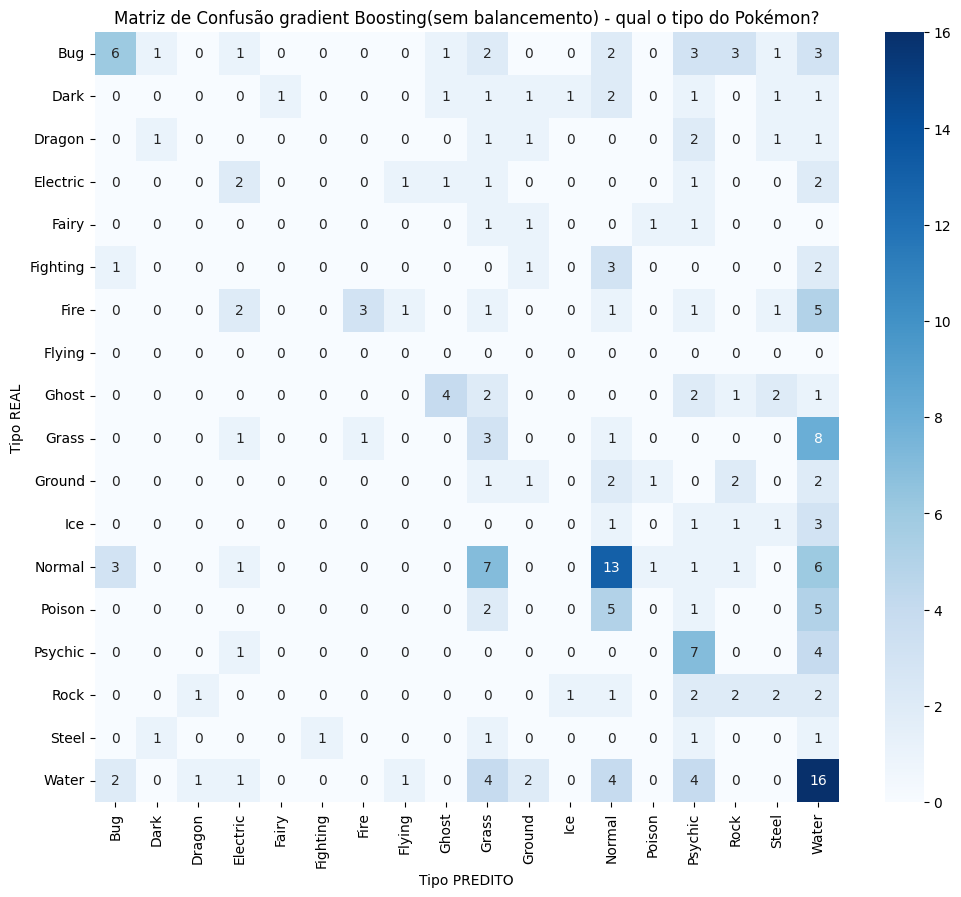

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)

plt.title('Matriz de Confusão gradient Boosting(sem balancemento) - qual o tipo do Pokémon?')
plt.ylabel('Tipo REAL')
plt.xlabel('Tipo PREDITO')
plt.show()


O que mais ajudou o modelo agora?
Phys_vs_Spec    0.153984
Speed_Share     0.148339
Total           0.136900
HP              0.105821
Def_vs_SpDef    0.098531
dtype: float64


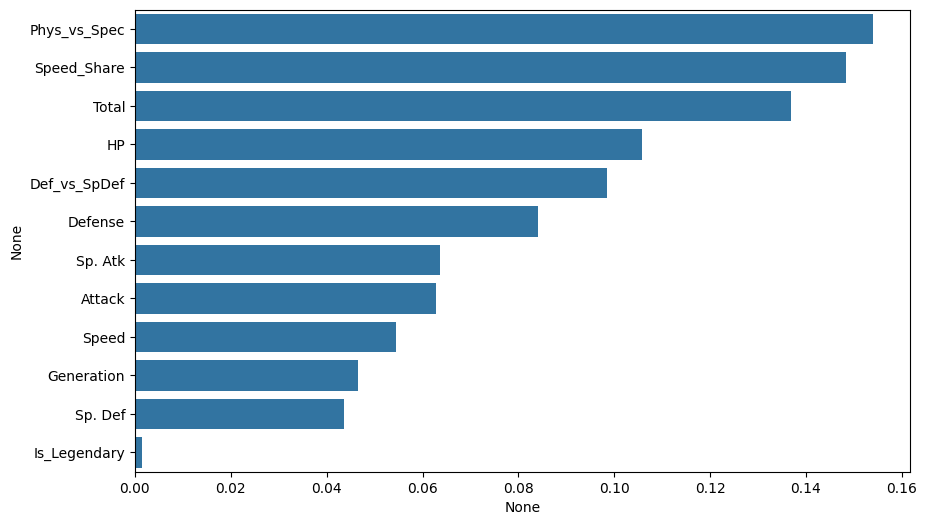

In [ ]:
# Mostrar as colunas mais importantes agora
feature_imp = pd.Series(model.feature_importances_, index=features_enhanced).sort_values(ascending=False)
print("\nO que mais ajudou o modelo agora?")
print(feature_imp.head(5))

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.show()

**Resposta =** Teve mais um leve aumento de 5%, entretanto ainda está muito baixo,mas se pode ver que a junção de variaveis deu um resultado positivo.

####Tentativa 3:Juntando tudo e Utilizando o balanceamento

Balanceamento: seria como se desse pontos as chances, se acertar um resultado com probabilidade baixa de sair, ganha mais ponto do que acertar um resultado facil de sair.

1. Gradient Boosting: 28.44%
2. Random Forest Balanceado: 27.56%

O que importa no Modelo Final?
Phys_vs_Spec      0.146833
Speed_Share       0.131907
Total             0.120421
HP                0.094313
Type 2_Encoded    0.089836
Def_vs_SpDef      0.087511
dtype: float64


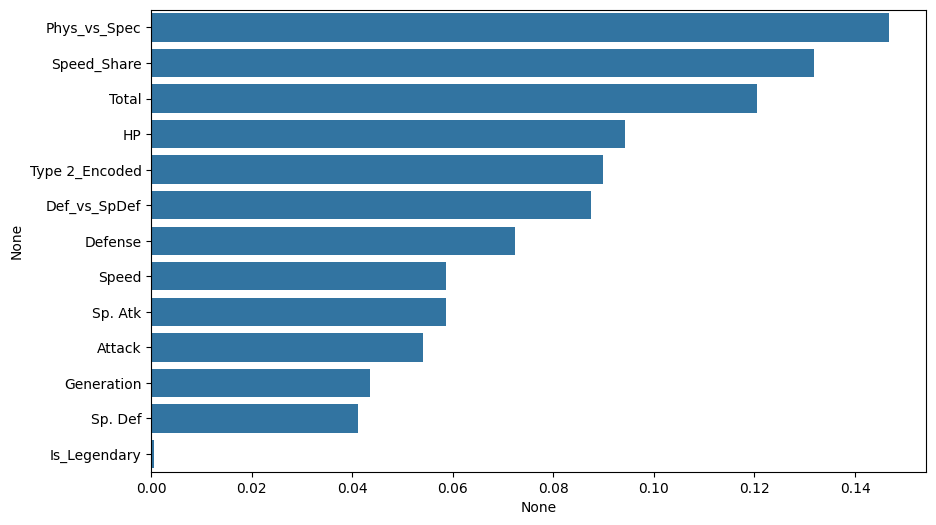

In [ ]:
df_tudo = df.copy()

df_tudo['Is_Legendary'] = df_tudo['Legendary'].map(int)
df_tudo['Phys_vs_Spec'] = df_tudo['Attack'] - df_tudo['Sp. Atk']
df_tudo['Def_vs_SpDef'] = df_tudo['Defense'] - df_tudo['Sp. Def']
df_tudo['Speed_Share'] = df_tudo['Speed'] / df_tudo['Total']

# 3. Tratamento do Type 2
df_tudo['Type 2_Filled'] = df_tudo['Type 2'].fillna('None')
le = LabelEncoder()
df_tudo['Type 2_Encoded'] = le.fit_transform(df_tudo['Type 2_Filled'])

features_all = [
    'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Total',
    'Generation', 'Is_Legendary',
    'Phys_vs_Spec', 'Def_vs_SpDef', 'Speed_Share',
    'Type 2_Encoded'
]

X = df_tudo[features_all]
y = df_tudo['Type 1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf.fit(X_train, y_train)
acc_gb = accuracy_score(y_test, gb_clf.predict(X_test))

# Random Forest com Balanceamento
rf_clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_clf.fit(X_train, y_train)
acc_rf = accuracy_score(y_test, rf_clf.predict(X_test))

print(f"1. Gradient Boosting: {acc_gb:.2%}")
print(f"2. Random Forest Balanceado: {acc_rf:.2%}")

# Ver importância das features no melhor modelo
best_model = gb_clf if acc_gb > acc_rf else rf_clf
feature_imp2 = pd.Series(best_model.feature_importances_, index=features_all).sort_values(ascending=False)
print("\nO que importa no Modelo Final?")
print(feature_imp2.head(6))

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp2, y=feature_imp2.index)
plt.show()

Matriz de confusão Arvore

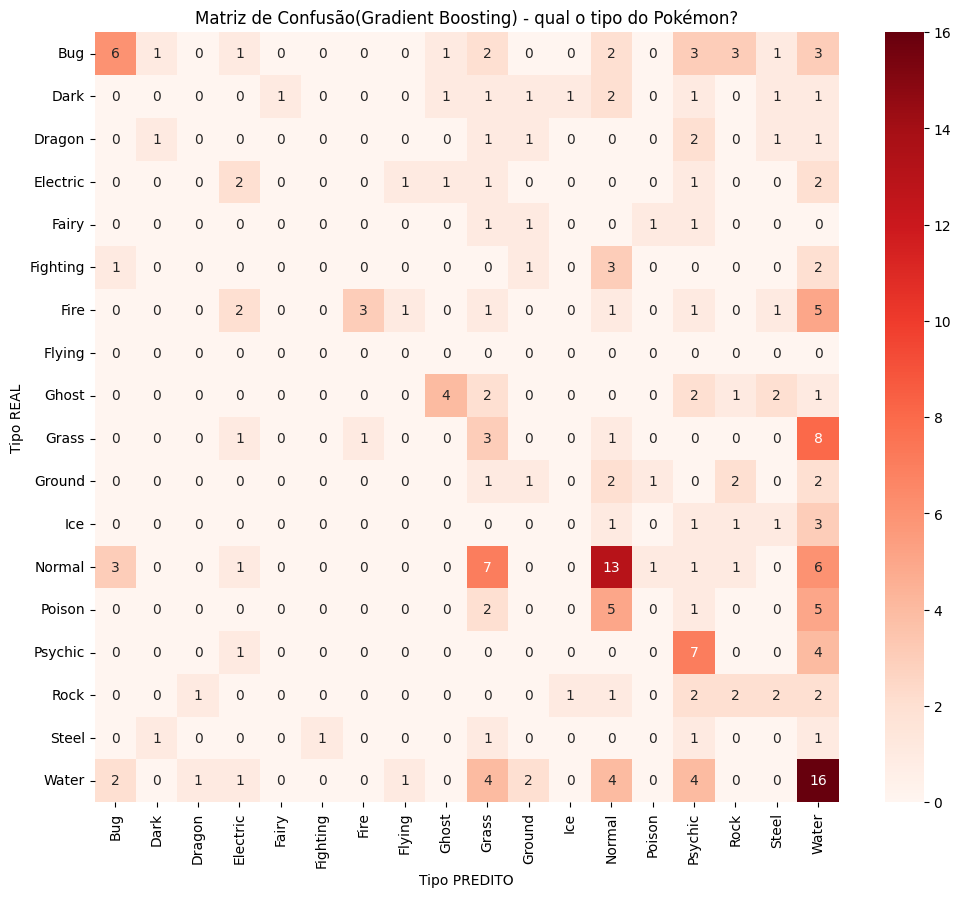

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds',
            xticklabels=gb_clf.classes_, yticklabels=gb_clf.classes_)

plt.title('Matriz de Confusão(Gradient Boosting) - qual o tipo do Pokémon?')
plt.ylabel('Tipo REAL')
plt.xlabel('Tipo PREDITO')
plt.show()

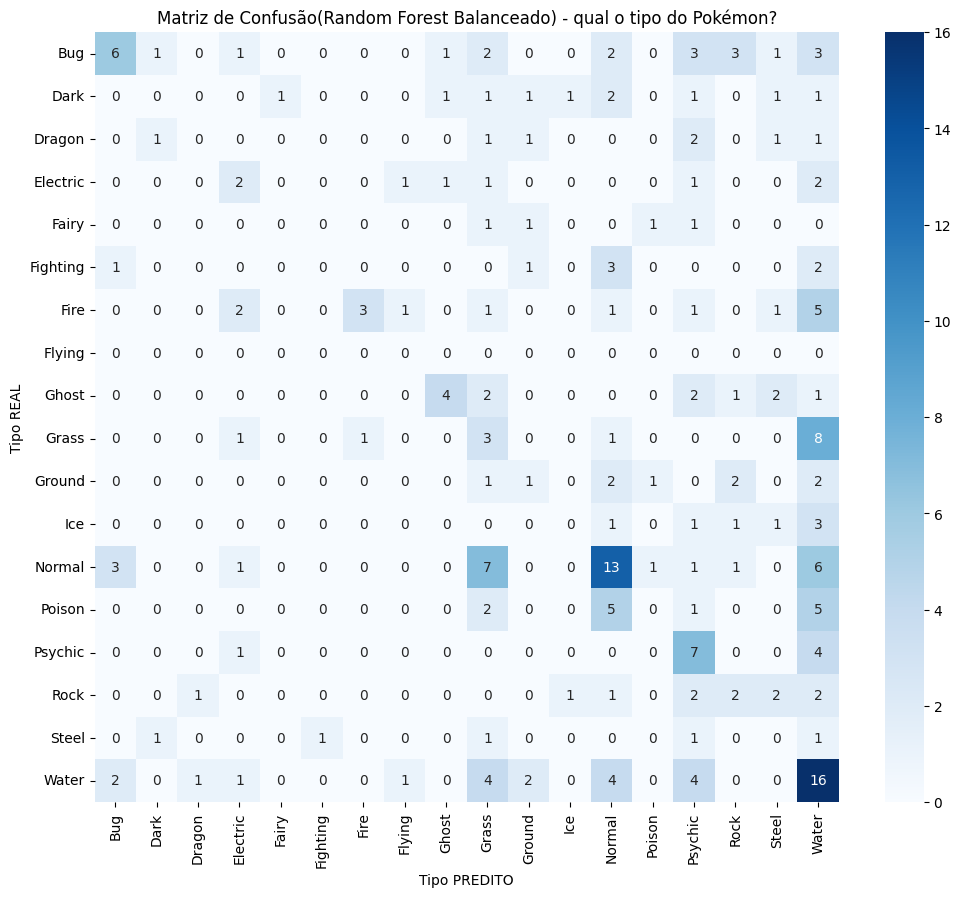

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf_clf.classes_, yticklabels=rf_clf.classes_)

plt.title('Matriz de Confusão(Random Forest Balanceado) - qual o tipo do Pokémon?')
plt.ylabel('Tipo REAL')
plt.xlabel('Tipo PREDITO')
plt.show()

**Resposta =** As duas metodologias tiveram seus aumento , o que é algo bom, entretaanto nenhuma delas chegou pelo menos a 30% de acerto, o que ainda seria considerado baixo, mesmo assim colocando pesos nas predições fez com que o algorirtimo tendesse a acertar mais, no caso do radom_forest, e já no caso da gradient boosting foram colocados todos os dados catogoricos, ou seja todas as colunas, mas os dados criados com relaões fortes entre status,  por ter mais dado acabou encontrando um nivel de padrão melhor, mais nçao bom o suficiente para ser considerado um modelo uma classificação segura do tipo.

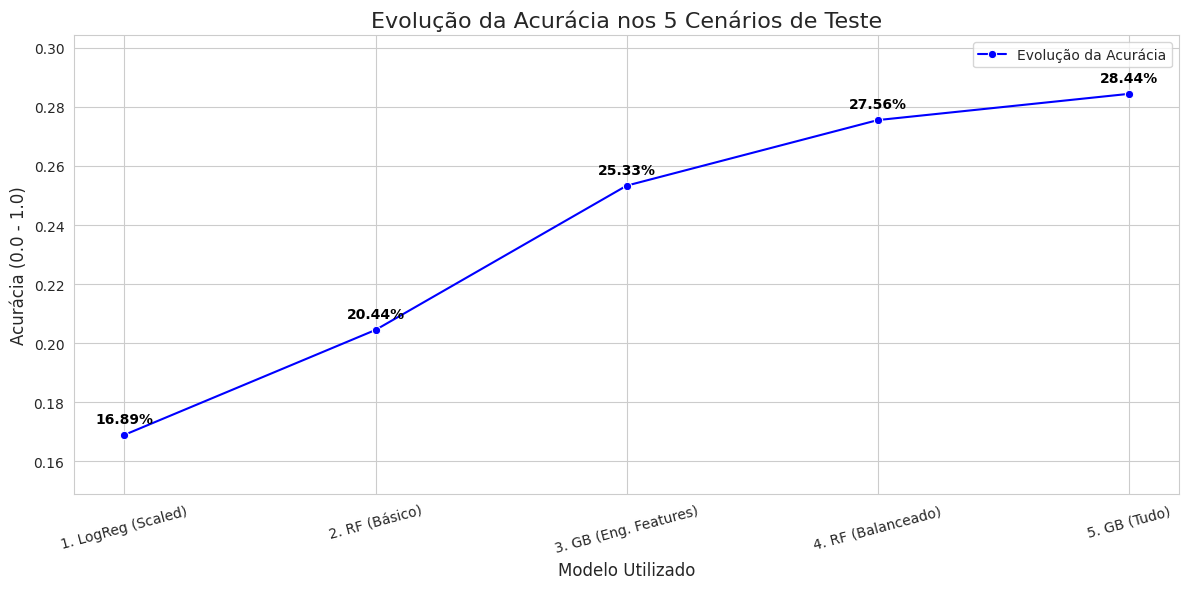

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#nome dos metodos
metodos = [
    '1. LogReg (Scaled)',
    '2. RF (Básico)',
    '3. GB (Eng. Features)',
    '4. RF (Balanceado)',
    '5. GB (Tudo)'

]
valores_acuracia = [accuracy_reg, accuracy_rf, accuracy_gb, acc_rf, acc_gb]

# Criando um DataFrame para facilitar o plot com Seaborn
df_resultados = pd.DataFrame({
    'Método': metodos,
    'Acurácia': valores_acuracia
})


plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Criar o gráfico de linha para mostrar a "Evolução"
ax=sns.lineplot(data=df_resultados, x='Método', y='Acurácia', marker='o', sort=False, color='b', label='Evolução da Acurácia')


# Adicionar o valor da porcentagem em cima de cada ponto
for index, row in df_resultados.iterrows():
    ax.text(index, row['Acurácia'] + 0.004, f"{row['Acurácia']:.2%}", color='black', ha="center", fontweight='bold')

plt.title('Evolução da Acurácia nos 5 Cenários de Teste', fontsize=16)
plt.ylabel('Acurácia (0.0 - 1.0)', fontsize=12)
plt.xlabel('Modelo Utilizado', fontsize=12)
plt.ylim(min(valores_acuracia) - 0.02, max(valores_acuracia) + 0.02) # Ajustar zoom do eixo Y
plt.xticks(rotation=15) # Rotacionar nomes para não sobrepor

plt.tight_layout()
plt.show()

### Conclusão

Não é possivel classificar o tipo do pokemon levando em consideração as estatisticas dele, uma vez que existem muitos pokemon e diversidade em relação a status, o que se da para fazer é chegar em uma especie de racicionio de predição onde a chance de acertar chega mais perto se considerar a estatistica mais alta, exemplo se so SP. Attack foi a estatistica mais alta a chance de ser um pokémon do tipo psiquico ou eletrico é maior do que ser um pokemon lutador ou pedra, mas não se tem um valor alto da certeza desse "palpite".

## Hipotese 2

É possivel descobri se o Pokémon é lendario se analizando a soma de status e o seu número na pokedex?

### Dados relevantes para a Hipotese

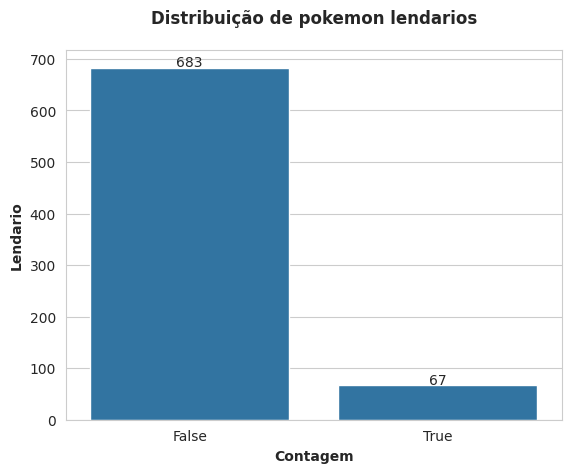

In [ ]:
ax =sns.countplot(data = df,x ="Legendary")

ax.set_xlabel('Contagem', weight='bold')
ax.set_ylabel('Lendario', weight='bold')
ax.set_title('Distribuição de pokemon lendarios', weight='bold', y=1.05)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,
        height + 2.5,
        int(height),
        ha='center'
    )


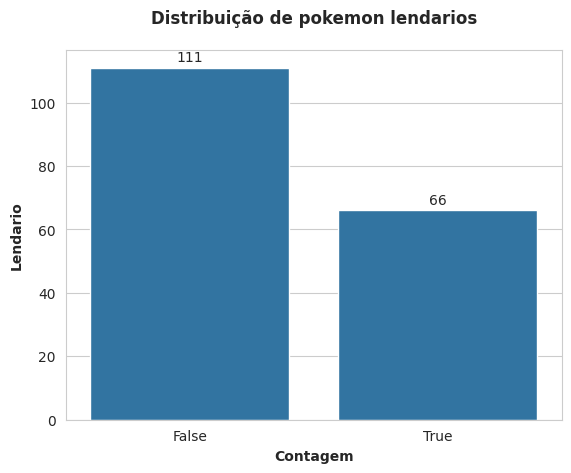

In [ ]:
Contagem = df[(df['Total'] > 500)]
ax =sns.countplot(data = Contagem,x ="Legendary")
ax.set_xlabel('Contagem', weight='bold')
ax.set_ylabel('Lendario', weight='bold')
ax.set_title('Distribuição de pokemon lendarios', weight='bold', y=1.05)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,
        height + 2,
        int(height),
        ha='center'
    )

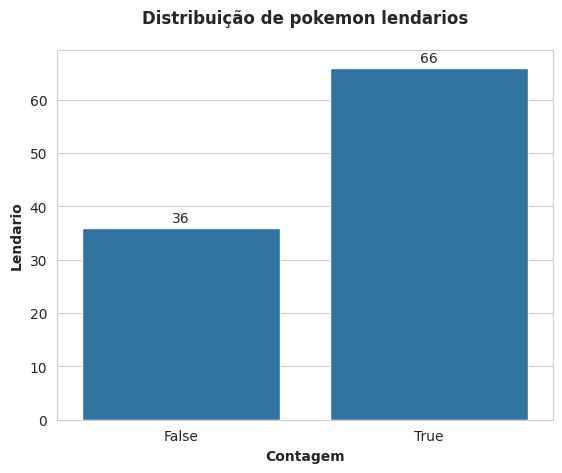

In [ ]:
Contagem = df[(df['Total'] > 530)]
ax =sns.countplot(data = Contagem,x ="Legendary")
ax.set_xlabel('Contagem', weight='bold')
ax.set_ylabel('Lendario', weight='bold')
ax.set_title('Distribuição de pokemon lendarios', weight='bold', y=1.05)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,
        height + 1,
        int(height),
        ha='center'
    )

**Analise** Podemos ver que a quantide de de lendários em comparação com pokemon normais é bem baixa, entretanto se levarmos em conta uma das principais caracteristicas dos lendarios, que é ter os seus status maiores que 500, a diderença fica menor , mesmo ainda tendo quase o dobro de pokemon normais, somente quando se bota o limite de 530  que os lendarios passam, em quantidade, os pokémon basicos

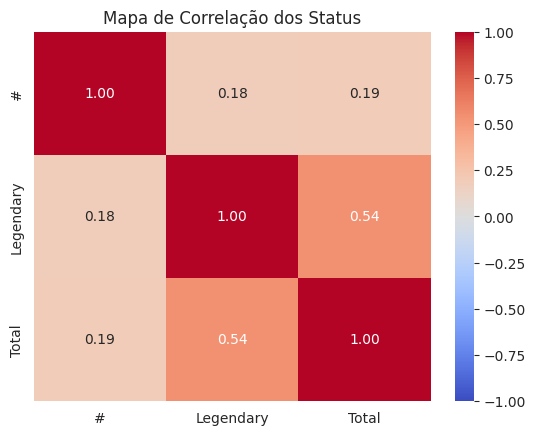

In [ ]:
corr_leg = df[["#","Legendary","Total"]].corr()
sns.heatmap(corr_leg, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title('Mapa de Correlação dos Status')

Text(0, 0.5, 'Total Stats')

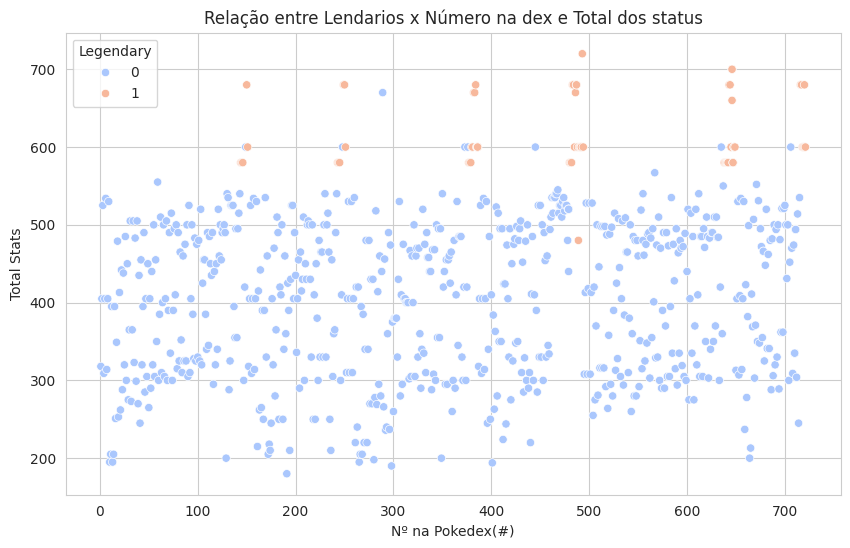

In [ ]:
df_leg = df.copy()

df_leg['Legendary'] = df_leg['Legendary'].map(int)
X = df_leg[['#', 'Total']]
y = df_leg['Legendary']

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_leg, x='#', y='Total', hue='Legendary', palette='coolwarm')
plt.title('Relação entre Lendarios x Número na dex e Total dos status')
plt.xlabel('Nº na Pokedex(#)')
plt.ylabel('Total Stats')

**Analise** Comprovado  o que o Heatmap mostra, além de perceber um padrão que todo inicio de centena aparece a quantidade de ledários

### Tentativa 1: Regressçao Logistica

In [ ]:
df_leg = df.copy()
df_leg['Legendary'] = df_leg['Legendary'].map(int)
X = df_leg[['#', 'Total']]
y = df_leg['Legendary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy_rel1 = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy_rel1: .2%} ")
print("Classification Report:")
print(class_report)


Accuracy:  97.33% 
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       136
           1       0.81      0.93      0.87        14

    accuracy                           0.97       150
   macro avg       0.90      0.95      0.93       150
weighted avg       0.98      0.97      0.97       150



Text(0.5, 1.0, 'Matriz de Confusão: Classificação de Pokémons Lendários')

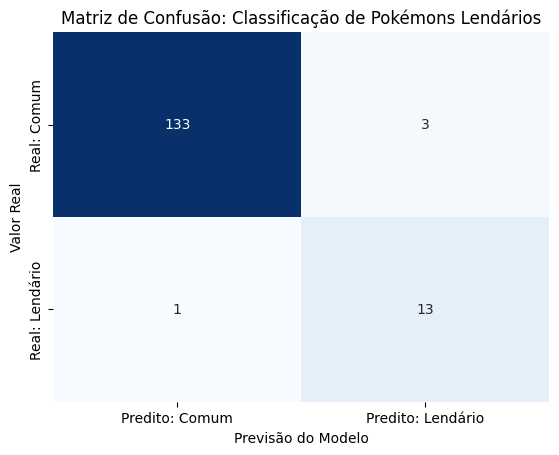

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predito: Comum', 'Predito: Lendário'],
            yticklabels=['Real: Comum', 'Real: Lendário'])
plt.xlabel('Previsão do Modelo')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão: Classificação de Pokémons Lendários')

In [ ]:
X = df[['#', 'Total']]

y = df['Legendary'].astype(int)

X_sm = sm.add_constant(X) # Adiciona a constante (necessário para regressão)
logit_model = sm.Logit(y, X_sm)
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.060983
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:              Legendary   No. Observations:                  750
Model:                          Logit   Df Residuals:                      747
Method:                           MLE   Df Model:                            2
Date:                Thu, 11 Dec 2025   Pseudo R-squ.:                  0.7974
Time:                        13:12:19   Log-Likelihood:                -45.737
converged:                       True   LL-Null:                       -225.74
Covariance Type:            nonrobust   LLR p-value:                 6.667e-79
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -40.4289      5.111     -7.910      0.000     -50.447     -30.411
#              0.0018      0

**Resposta** Já se mostrou muito eficiente, tendo mais de 95% de precissão,dos 150 pokemon analisados errou só 4, e mostrando que realmente a soma de status é importante para um lendario

### Melhorando o código

####1º tentativa:Adicionando a varivavel geração a predição

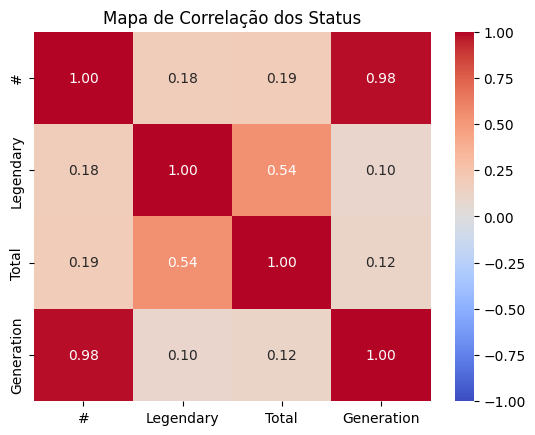

In [ ]:
corr_leg = df[["#","Legendary","Total","Generation"]].corr()
sns.heatmap(corr_leg, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title('Mapa de Correlação dos Status')
plt.savefig('correlation_heatmap.png')

**Analise** Não se mostrou ter uma grande coorelação, mas pode ser o suficiente para melhora um pouco o modelo

In [ ]:
df_leg['Legendary'] = df_leg['Legendary'].map(int)
X = df_leg[['#', 'Total','Generation']]
y = df_leg['Legendary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


accuracy_rel2 = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy_rel2: .2%} ")
print("Classification Report:")
print(class_report)


Accuracy:  97.33% 
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       136
           1       0.81      0.93      0.87        14

    accuracy                           0.97       150
   macro avg       0.90      0.95      0.93       150
weighted avg       0.98      0.97      0.97       150



In [ ]:
X = df[['#', 'Total', 'Generation']]
y = df['Legendary'].astype(int)

X_sm = sm.add_constant(X)
logit_model = sm.Logit(y, X_sm)
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.049979
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:              Legendary   No. Observations:                  750
Model:                          Logit   Df Residuals:                      746
Method:                           MLE   Df Model:                            3
Date:                Thu, 11 Dec 2025   Pseudo R-squ.:                  0.8340
Time:                        13:13:07   Log-Likelihood:                -37.484
converged:                       True   LL-Null:                       -225.74
Covariance Type:            nonrobust   LLR p-value:                 2.694e-81
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -33.2554      5.033     -6.608      0.000     -43.119     -23.391
#              0.0471      0

Matriz  de confusão

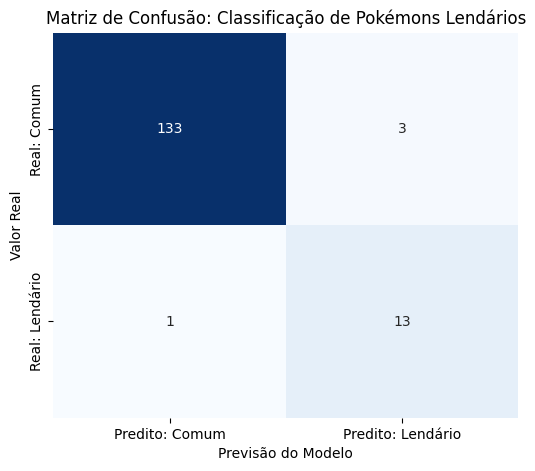

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predito: Comum', 'Predito: Lendário'],
            yticklabels=['Real: Comum', 'Real: Lendário'])

plt.xlabel('Previsão do Modelo')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão: Classificação de Pokémons Lendários')

plt.show()

**Resultado** Teve um aumento de 0,33%, tendo um aumento quase irrelevante para esse modelo que já possui uma taxa alta de acerto, porém mostra que mesmo que pouco a geração mostra uma relevancia para saber se é lendario ou não

#### 2º tentativa de melhoria:Utilizando os status e não o total

Text(0.5, 1.0, 'Correlação entre Status e Ser Lendário')

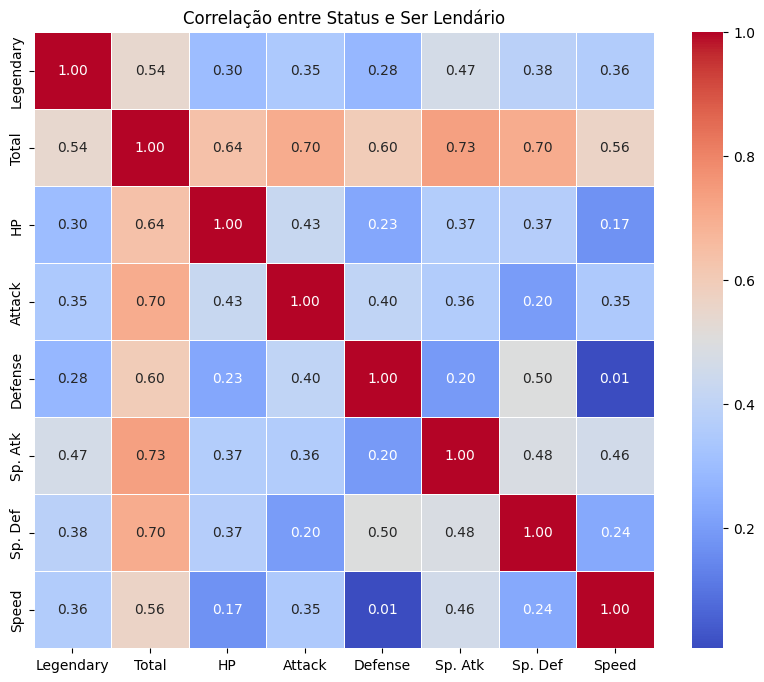

In [ ]:
df_leg = df.copy()
df_leg['Legendary'] = df_leg['Legendary'].map(int)

features = ['Legendary','Total','HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
correlation_matrix = df_leg[features].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlação entre Status e Ser Lendário')

In [ ]:
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

X = df_leg[features]
y = df_leg['Legendary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000) # Aumentei o max_iter para garantir convergência
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy_stat = accuracy_score(y_test, y_pred)
print(f"Accuracy com Status Individuais: {accuracy_stat:.2%} ")

Accuracy com Status Individuais: 97.33% 


**Resultado** = Não teve nenhuma alteração já que a correlação dos status dentem a ser medianas para baixas não teve consequencia no modelo que já é bom

**Resultado** = Usando os status teve um leve decrescimento, o que ainda o deixa como um otimo modelo,deve essa perda de acuracia pois as similaridades entre estatistica e pokemon vão ed frente com a primeira hipotese, não tem com somente esses dados predizer o pokemon atraves do status, isso também conta se ele é lendario ou não, pois tem um stat alto não siginifica ser lendario, exAlakazam tem mais de 110 de sp.Attack mas ele é normal, enquanto Regirock, um lendairio, possuem apenas 50 de sp.attack

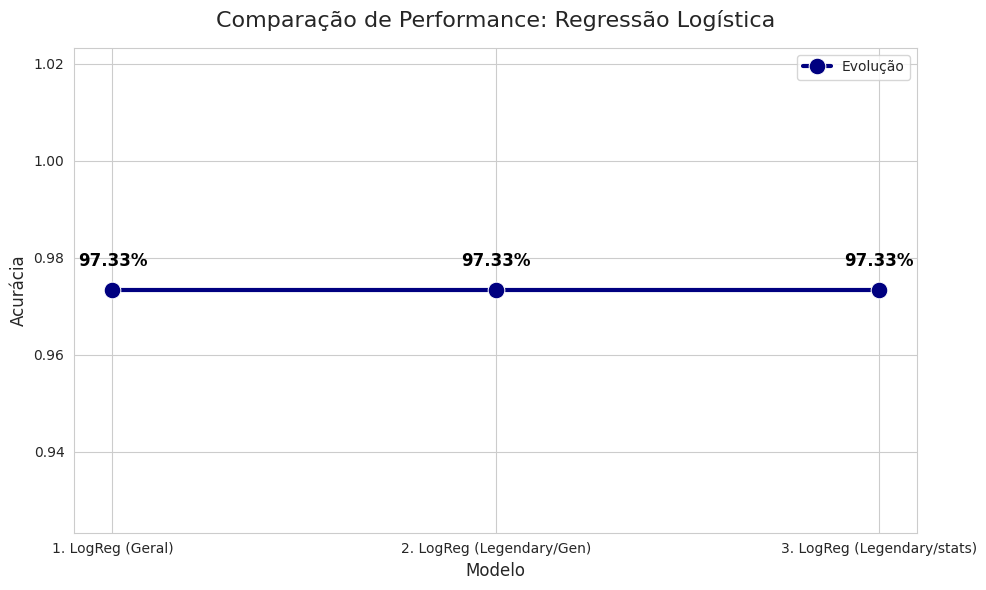

In [ ]:
cenarios = [
    '1. LogReg (Geral)',
    '2. LogReg (Legendary/Gen)',
    '3. LogReg (Legendary/stats)'
]

valores_acuracia = [
    accuracy_rel1,
    accuracy_rel2,
    accuracy_stat
]

df_compare = pd.DataFrame({
    'Cenário': cenarios,
    'Acurácia': valores_acuracia
})


plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Gráfico de Linha (Para mostrar a evolução/diferença)
ax=sns.lineplot(data=df_compare, x='Cenário', y='Acurácia',
             marker='o', markersize=12, color='navy', linewidth=3, label='Evolução')


# Adicionar a porcentagem em cima de cada barra/ponto
for index, row in df_compare.iterrows():
    ax.text(
        x=index,
        y=row['Acurácia'] + 0.005,
        s=f"{row['Acurácia']:.2%}",
        color='black',
        ha="center",
        fontweight='bold',
        fontsize=12
    )

# Títulos e Rótulos
plt.title('Comparação de Performance: Regressão Logística', fontsize=16, pad=15)
plt.ylabel('Acurácia', fontsize=12)
plt.xlabel('Modelo', fontsize=12)

# Ajuste automático do zoom do eixo Y para destacar a diferença
min_val = min(valores_acuracia)
max_val = max(valores_acuracia)
plt.ylim(min_val - 0.05, max_val + 0.05)

plt.legend()
plt.tight_layout()
plt.show()

###Retirando os miticos

O Manaphy é um o pokemon Miticos/Lendários que fogem da regra de ter status elevados

In [ ]:
df[(df['Legendary'] == True)& (df['Total']<500)]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
547,489,Phione,Water,NaN,480,80,80,80,80,80,80,4,True


In [ ]:
df['Legendary'].sum()

np.int64(67)

In [ ]:
nomes = [
    "Mew",
    "Celebi",
    "Cresselia",
    "Phione",
    "Manaphy",
    "KeldeoOrdinary Forme",
    "KeldeoResolute Forme",
    "MeloettaAria Forme",
    "MeloettaPirouette Forme",
    "Genesect",
    "Jirachi",
    "DeoxysNormal Forme",
    "DeoxysAttack Forme",
    "DeoxysDefense Forme",
    "DeoxysSpeed Forme",
    "Darkrai",
    "ShayminLand Forme",
    "ShayminSky Forme",
    "Arceus",
    "Victini",
    "Diancie",
    "HoopaHoopa Confined",
    "HoopaHoopa Unbound",
    "Volcanion",
]

df.loc[df['Name'].isin(nomes), 'Legendary'] = False


In [ ]:
df['Legendary'].sum()

np.int64(43)

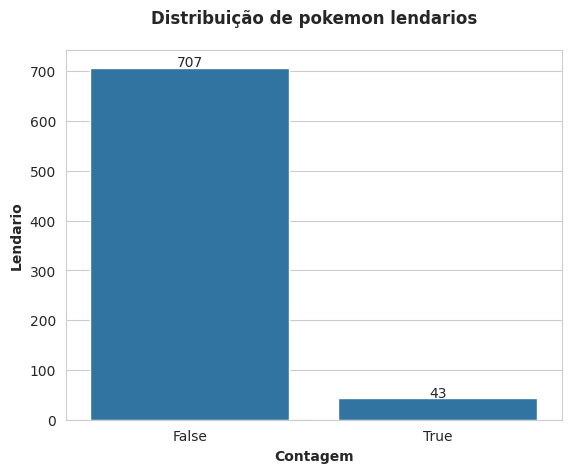

In [ ]:
ax =sns.countplot(data = df,x ="Legendary")

ax.set_xlabel('Contagem', weight='bold')
ax.set_ylabel('Lendario', weight='bold')
ax.set_title('Distribuição de pokemon lendarios', weight='bold', y=1.05)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,
        height + 2.5,
        int(height),
        ha='center'
    )


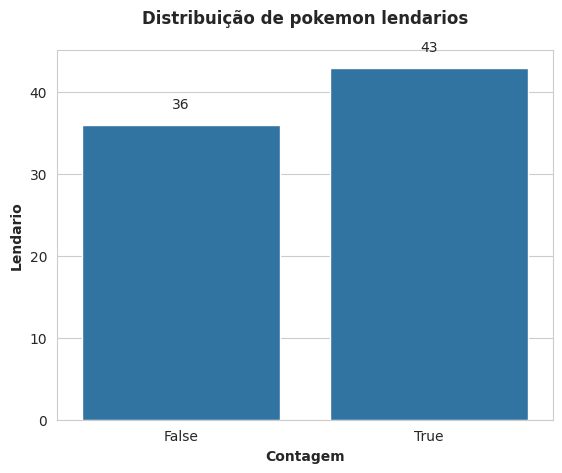

In [ ]:
Contagem = df[(df['Total'] > 540)]
ax =sns.countplot(data = Contagem,x ="Legendary")
ax.set_xlabel('Contagem', weight='bold')
ax.set_ylabel('Lendario', weight='bold')
ax.set_title('Distribuição de pokemon lendarios', weight='bold', y=1.05)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,
        height + 2,
        int(height),
        ha='center'
    )

**Analise** Segue a amesma situação da anterior, mas agora tem que ser limite de 540 ao inves de 530

Text(0.5, 1.0, 'Mapa de Correlação dos Status')

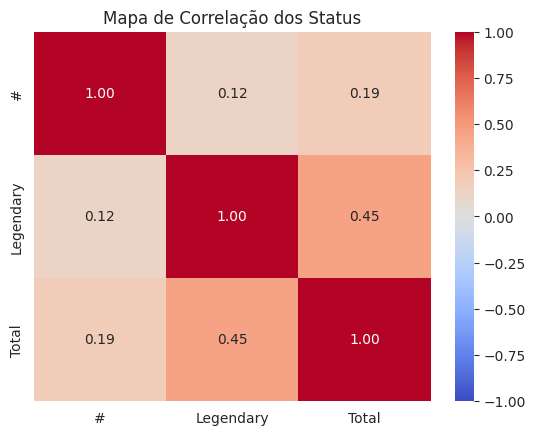

In [ ]:
corr_leg = df[["#","Legendary","Total"]].corr()
sns.heatmap(corr_leg, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title('Mapa de Correlação dos Status')

Replicando os modelos, mostrarei só o resultado para não ser repetitivo e cansativo

####1º Metodo

In [ ]:
df_leg = df.copy()
df_leg['Legendary'] = df_leg['Legendary'].map(int)
X = df_leg[['#', 'Total']]
y = df_leg['Legendary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy_rel1 = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy_rel1: .2%} ")
print("Classification Report:")
print(class_report)


Accuracy:  96.67% 
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       141
           1       1.00      0.44      0.62         9

    accuracy                           0.97       150
   macro avg       0.98      0.72      0.80       150
weighted avg       0.97      0.97      0.96       150



Text(0.5, 1.0, 'Matriz de Confusão: Classificação de Pokémons Lendários')

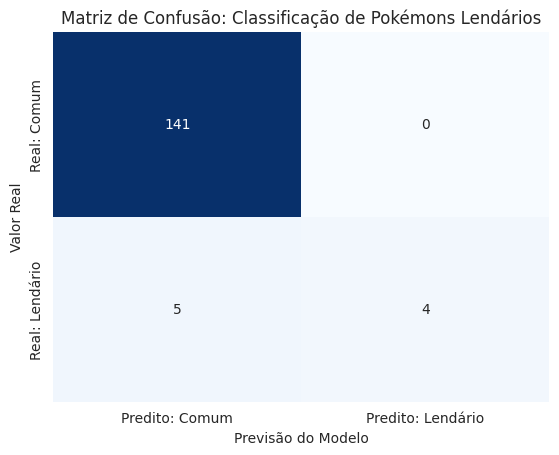

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predito: Comum', 'Predito: Lendário'],
            yticklabels=['Real: Comum', 'Real: Lendário'])
plt.xlabel('Previsão do Modelo')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão: Classificação de Pokémons Lendários')

**Analise** Errou somente 5 de 150

####2º Metodo

In [ ]:
df_leg['Legendary'] = df_leg['Legendary'].map(int)
X = df_leg[['#', 'Total','Generation']]
y = df_leg['Legendary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


accuracy_rel2 = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy_rel2: .2%} ")
print("Classification Report:")
print(class_report)


Accuracy:  97.33% 
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       136
           1       0.81      0.93      0.87        14

    accuracy                           0.97       150
   macro avg       0.90      0.95      0.93       150
weighted avg       0.98      0.97      0.97       150



####3º metodo

In [ ]:
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

X = df_leg[features]
y = df_leg['Legendary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000) # Aumentei o max_iter para garantir convergência
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy_stat = accuracy_score(y_test, y_pred)
print(f"Accuracy com Status Individuais: {accuracy_stat:.2%} ")

Accuracy com Status Individuais: 97.33% 


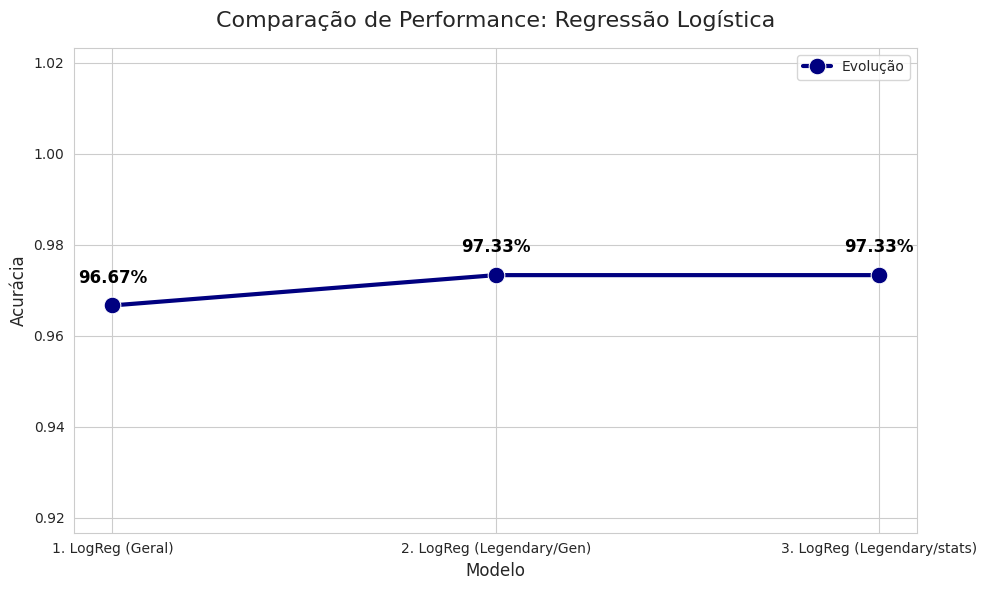

In [ ]:
cenarios = [
    '1. LogReg (Geral)',
    '2. LogReg (Legendary/Gen)',
    '3. LogReg (Legendary/stats)'
]

valores_acuracia = [
    accuracy_rel1,
    accuracy_rel2,
    accuracy_stat
]

df_compare = pd.DataFrame({
    'Cenário': cenarios,
    'Acurácia': valores_acuracia
})


plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Gráfico de Linha (Para mostrar a evolução/diferença)
ax=sns.lineplot(data=df_compare, x='Cenário', y='Acurácia',
             marker='o', markersize=12, color='navy', linewidth=3, label='Evolução')


# Adicionar a porcentagem em cima de cada barra/ponto
for index, row in df_compare.iterrows():
    ax.text(
        x=index,
        y=row['Acurácia'] + 0.005,
        s=f"{row['Acurácia']:.2%}",
        color='black',
        ha="center",
        fontweight='bold',
        fontsize=12
    )

# Títulos e Rótulos
plt.title('Comparação de Performance: Regressão Logística', fontsize=16, pad=15)
plt.ylabel('Acurácia', fontsize=12)
plt.xlabel('Modelo', fontsize=12)

# Ajuste automático do zoom do eixo Y para destacar a diferença
min_val = min(valores_acuracia)
max_val = max(valores_acuracia)
plt.ylim(min_val - 0.05, max_val + 0.05)

plt.legend()
plt.tight_layout()
plt.show()

**Resposta** Os Miticos só impantam no modelo se ele levar em consiferação somente os status e numero da Dex, pois como falado antes miticos e lendarios tem as mesmas regras,por isso ele cai de produção, mas quando coloca a gen ela cria um filtro  e mantem a procentagem do modelo considerando os miticos como lendarios

**Palpite da lógica:** Pode ser que ele pegue por exemplo na gen 1 não existem muitos pokemon com altas somas de status, tendo somente o dragonite de psedo-lendario e o Arcanine  que passsam nos totais de status de 550, portanto analisar a geração as vezes podem diminuir as chances do modelo errar por descartar muitas probabilidade que só o número da dex não conseguia retirar,por exemplo o Gyarados poderia entrar pois ele fica no meio para o final da dex, ou o aerodactyl que os 2 possuem mais de 500 de total de status base<br>
Entretanto ainda existem os miticos, pokemon uncicos que só foram disponibilizados no jogo via evento, que não são considerados lendarios mas compartilham algumas caracteristicas, como ser no final da dex e alguns terem soma de status altos, no dataset, embora acha uma discussão na comunidade sobre mitico não ser lendarios

###  Conclusão

Sim, da para caracterizar se o pokemon é lendario atráves do seu total de status e numero na dex entretanto adiocionar a variavel geração  é algo vantajoso por ajudar a limpar o filtro mais ainda, mas separar por status não ajuda já que não é um padrão pokemon lendario tem um status especifico como alto e sim a soma de todos eles, mesmo se tiver algum status bbaixo com certeza tera algum status mais elevado que ira compensar ele na hora da soma. Em resumo tem como  provado que existe um padrão quase fixo de como um lendario se caracteriza, e retirando ou não os pokemon mitico não altera em nada a classificação de um pokémon


##Hipotese 3

Existe correção e se sim, de quanto, entre um status em outro?
Foram escolhidos os dados para os tipo de pokemon conhecido como glass cannon, bate forte e rapido, mas tem pouco hp

### Dados para a hipotese

Melhores variaveis para prediçã com Speed são: Sp. Atk


<Axes: >

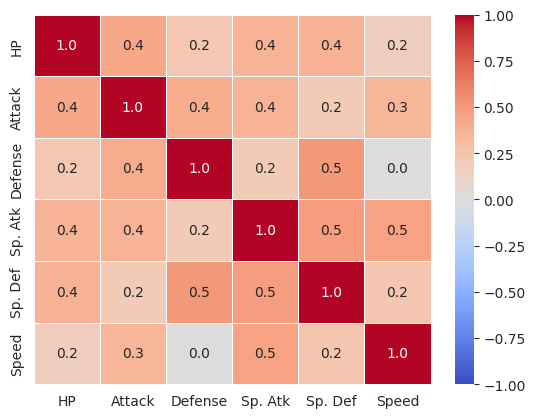

In [ ]:
target = 'Speed'
numeric_cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def']
corr_matrix = df[numeric_cols + [target]].corr()
best_predictor = corr_matrix[target].drop(target).idxmax()
print(f"Melhores variaveis para prediçã com Speed são: {best_predictor}")
sns.heatmap(data = corr_matrix,annot=True, fmt=".1f", cmap="coolwarm",vmin=-1 ,vmax=1,linewidths=.5)


**Analise** Podemos ver as correlações com a speed, e é perceptivel que as que mais são compativeis são os ataques fisicos e especias, com o ataque especial sendo o maior de todos, mas será analizado so 2

###Regressão linear

In [ ]:
#Sp. attack  influencia na speed

X_sm = df['Sp. Atk']
y_sm = df['Speed']
X_sm_const = sm.add_constant(X_sm) # Adiciona intercepto (beta_0)

model_sm = sm.OLS(y_sm, X_sm_const).fit()
print("=== Resumo Regressão Simples ===")
print(model_sm.summary())

=== Resumo Regressão Simples ===
                            OLS Regression Results                            
Dep. Variable:                  Speed   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     198.4
Date:                Thu, 11 Dec 2025   Prob (F-statistic):           3.91e-40
Time:                        14:48:17   Log-Likelihood:                -3470.4
No. Observations:                 750   AIC:                             6945.
Df Residuals:                     748   BIC:                             6954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.70

In [ ]:
#Attack  influencia na speed

X_sm2 = df['Attack']
y_sm2 = df['Speed']
X_sm_const_2 = sm.add_constant(X_sm2) # Adiciona intercepto (beta_0)

model_sm = sm.OLS(y_sm2, X_sm_const_2).fit()
print("=== Resumo Regressão Simples ===")
print(model_sm.summary())

=== Resumo Regressão Simples ===
                            OLS Regression Results                            
Dep. Variable:                  Speed   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     103.4
Date:                Thu, 11 Dec 2025   Prob (F-statistic):           7.74e-23
Time:                        14:54:56   Log-Likelihood:                -3510.1
No. Observations:                 750   AIC:                             7024.
Df Residuals:                     748   BIC:                             7033.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.71

Podemos ver que os modelos tem um resultando interressante, onde no Sp.Attack explica cerca de 22% dos casos e no attack explica 12% e os coeficiente são até alto para o atauqe espeicla a cada 1 ponto  dele vai 0.42 para speed e para o ataque fisico é 0.32

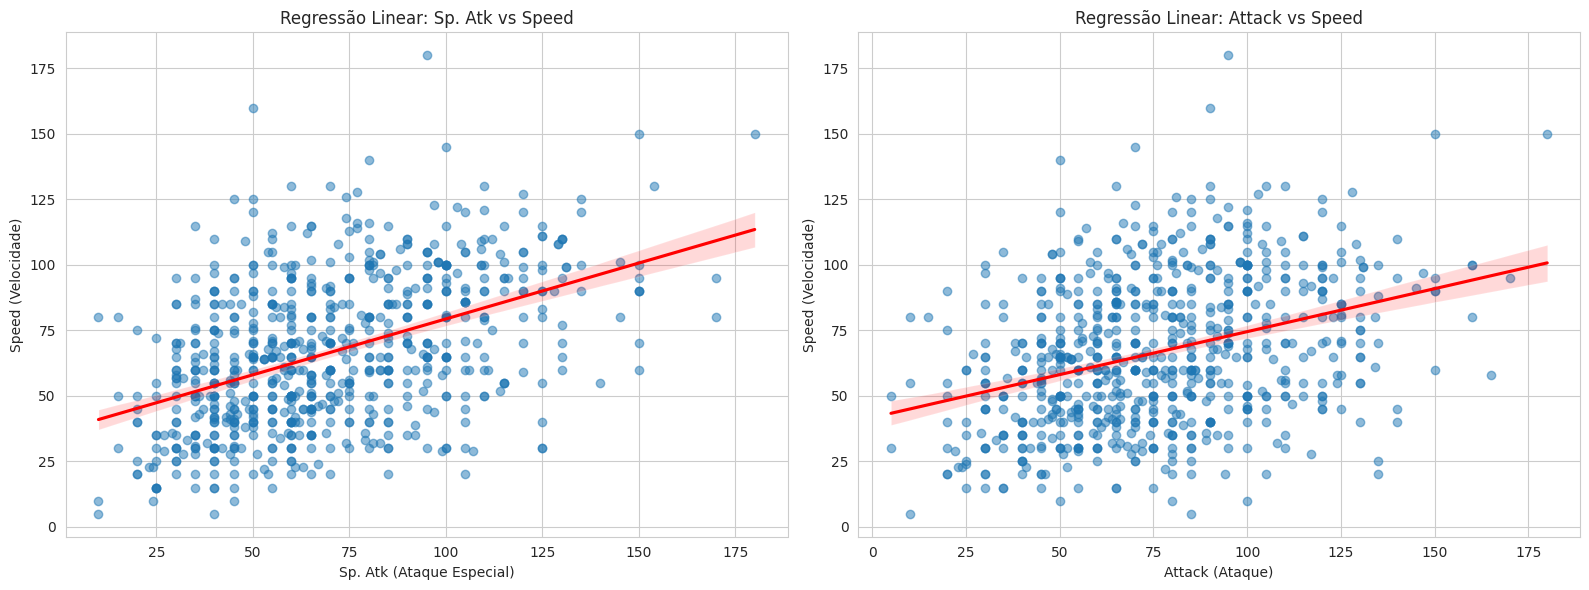

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.regplot(ax=axes[0], x='Sp. Atk', y='Speed', data=df,
            line_kws={"color": "red"}, scatter_kws={'alpha':0.5})
axes[0].set_title('Regressão Linear: Sp. Atk vs Speed')
axes[0].set_xlabel('Sp. Atk (Ataque Especial)')
axes[0].set_ylabel('Speed (Velocidade)')
axes[0].grid(True)

sns.regplot(ax=axes[1], x='Attack', y='Speed', data=df,
            line_kws={"color": "red"}, scatter_kws={'alpha':0.5})
axes[1].set_title('Regressão Linear: Attack vs Speed')
axes[1].set_xlabel('Attack (Ataque)')
axes[1].set_ylabel('Speed (Velocidade)')
axes[1].grid(True)

plt.tight_layout()
plt.show()

**Analise** Mostrando que realmente existe uma correlação entre os ataques e a Speed, que a caracteristicas de glass cannon tem relção deles terem ataques e velocidades altas

###Regressão polinomial

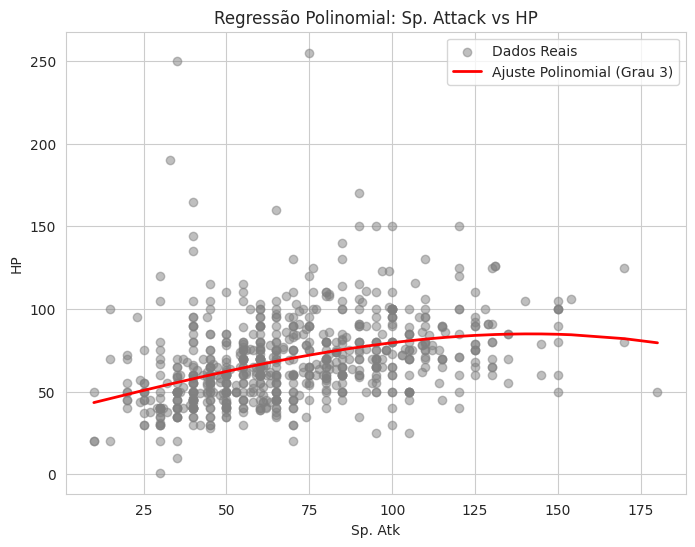

In [ ]:
# Hipótese: Relação não linear entre Ataque especial e HP?
X_poly_in = df[['Sp. Atk']]
y_poly_in = df['HP']

poly = PolynomialFeatures(degree=3) # Grau 3
X_poly = poly.fit_transform(X_poly_in)

model_poly = LinearRegression()
model_poly.fit(X_poly, y_poly_in)
y_poly_pred = model_poly.predict(X_poly)

# Visualização Polinomial
plt.figure(figsize=(8, 6))
plt.scatter(X_poly_in, y_poly_in, color='gray', alpha=0.5, label='Dados Reais')
# Ordenar para plotar a linha corretamente
sort_axis = np.argsort(X_poly_in.iloc[:, 0])
plt.plot(X_poly_in.iloc[sort_axis], y_poly_pred[sort_axis], color='red', label='Ajuste Polinomial (Grau 3)', linewidth=2)
plt.xlabel('Sp. Atk')
plt.ylabel('HP')
plt.title('Regressão Polinomial: Sp. Attack vs HP')
plt.legend()

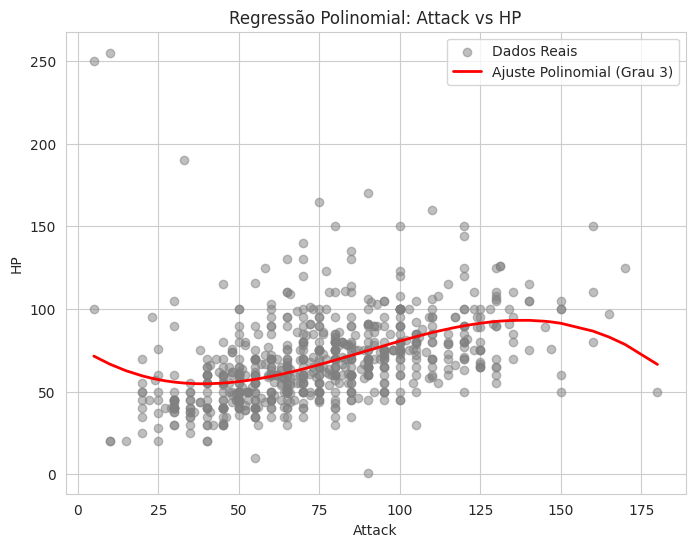

In [ ]:
# Hipótese: Relação não linear entre Ataque e HP?
X_poly_in = df[['Attack']]
y_poly_in = df['HP']

poly = PolynomialFeatures(degree=3) # Grau 3
X_poly = poly.fit_transform(X_poly_in)

model_poly = LinearRegression()
model_poly.fit(X_poly, y_poly_in)
y_poly_pred = model_poly.predict(X_poly)

# Visualização Polinomial
plt.figure(figsize=(8, 6))
plt.scatter(X_poly_in, y_poly_in, color='gray', alpha=0.5, label='Dados Reais')
# Ordenar para plotar a linha corretamente
sort_axis = np.argsort(X_poly_in.iloc[:, 0])
plt.plot(X_poly_in.iloc[sort_axis], y_poly_pred[sort_axis], color='red', label='Ajuste Polinomial (Grau 3)', linewidth=2)
plt.xlabel('Attack')
plt.ylabel('HP')
plt.title('Regressão Polinomial: Attack vs HP')
plt.legend()

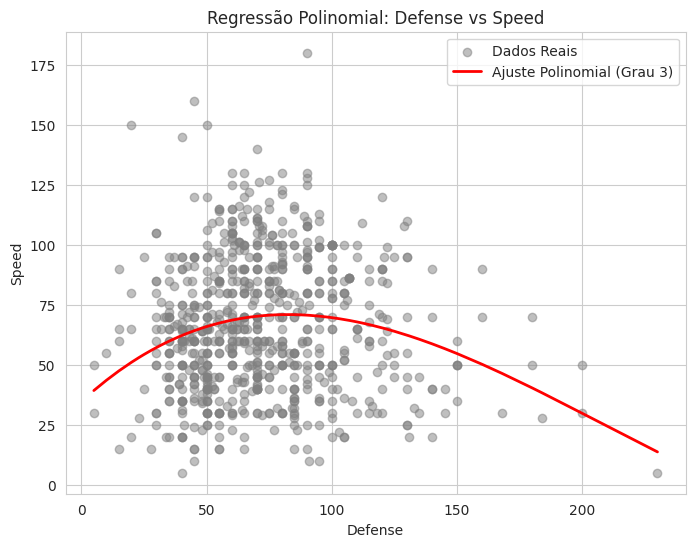

In [ ]:
# Hipótese: Relação não linear entre Defense e Speed?
X_poly_in = df[['Defense']]
y_poly_in = df['Speed']

poly = PolynomialFeatures(degree=3) # Grau 3
X_poly = poly.fit_transform(X_poly_in)

model_poly = LinearRegression()
model_poly.fit(X_poly, y_poly_in)
y_poly_pred = model_poly.predict(X_poly)

# Visualização Polinomial
plt.figure(figsize=(8, 6))
plt.scatter(X_poly_in, y_poly_in, color='gray', alpha=0.5, label='Dados Reais')
# Ordenar para plotar a linha corretamente
sort_axis = np.argsort(X_poly_in.iloc[:, 0])
plt.plot(X_poly_in.iloc[sort_axis], y_poly_pred[sort_axis], color='red', label='Ajuste Polinomial (Grau 3)', linewidth=2)
plt.xlabel('Defense')
plt.ylabel('Speed')
plt.title('Regressão Polinomial: Defense vs Speed')
plt.legend()

Mostrando novamente a hipotese que quanto maior o ataque fisico mais fragil ele é, no caso ter menos HP, enquanto a defesa,  como é caracterizado um tank, um counter dos glass cannon, onde eles possuem um ataque alto e compensação possuem uma speed muito baixa

Regressão multipla é outra hipotese


=== Scikit-learn (Regressão Múltipla) ===
Coeficientes: [-0.12639977  0.4287483 ]
Intercepto: 46.45310464936843
R2 Score: 0.16276664154038978


Text(0.5, 1.0, 'Regressão Múltipla: Real vs Predito (Speed + Attack -> Defense)')

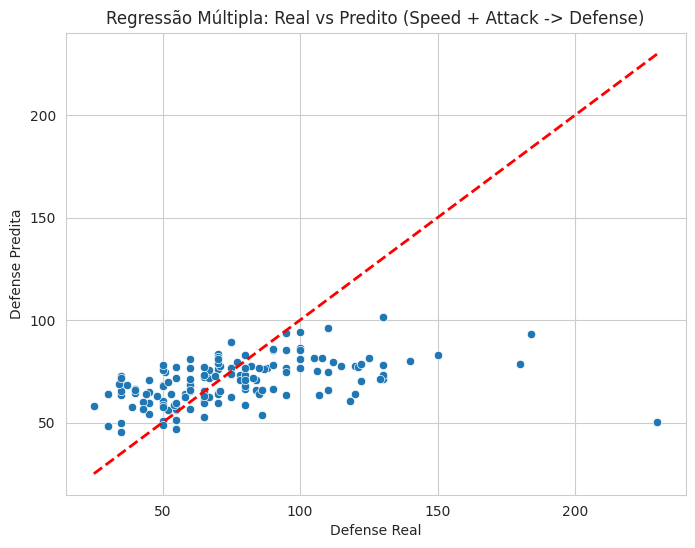

In [ ]:
# --- 2. Scikit-learn: Regressão Linear Múltipla ---
# Hipótese: HP e Attack preveem Defense?
X_multi = df[['Speed', 'Attack']]
y_multi = df['Defense']

X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

model_sk = LinearRegression()
model_sk.fit(X_train, y_train)
y_pred_multi = model_sk.predict(X_test)

print("\n=== Scikit-learn (Regressão Múltipla) ===")
print(f"Coeficientes: {model_sk.coef_}")
print(f"Intercepto: {model_sk.intercept_}")
print(f"R2 Score: {r2_score(y_test, y_pred_multi)}")

# Visualização Real vs Predito (Múltipla)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_multi)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Linha ideal
plt.xlabel('Defense Real')
plt.ylabel('Defense Predita')
plt.title('Regressão Múltipla: Real vs Predito (Speed + Attack -> Defense)')

**Analise** Mostrando que quando mais speed e Ataque se tem menor é o sua Defesa, portanto esses tipos de pokemon possuema tendencia de tentar derrubar o adversario com 1 unico golpe, sabendo que vai atacar primeiro, por isso é sempre bom se ter um tabnque na equipe, onde consugue aguentar o ataque do glass canonm, e podendo ou derrota-lo ou deixar com a vida baixa


=== Scikit-learn (Regressão Múltipla) ===
Coeficientes: [-0.0890344  0.2388483]
Intercepto: 59.92443107970886
R2 Score: 0.013065626885174209


Text(0.5, 1.0, 'Regressão Múltipla: Real vs Predito (Speed + Sp. Atk -> Defense)')

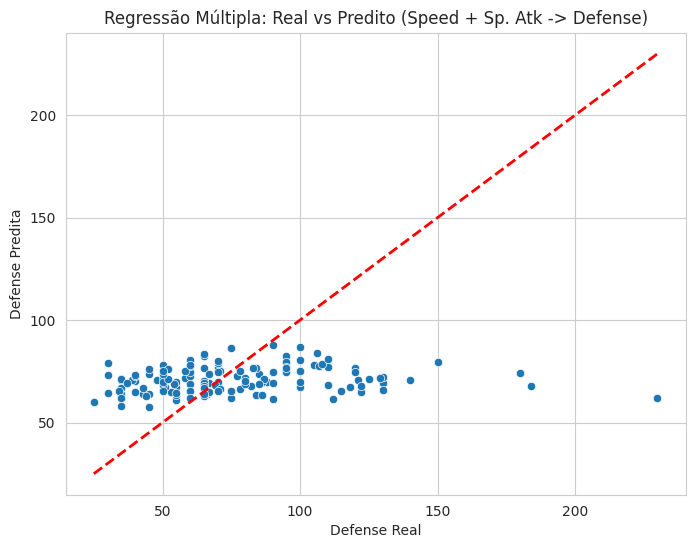

In [ ]:
# --- 2. Scikit-learn: Regressão Linear Múltipla ---
X_multi = df[['Speed', 'Sp. Atk']]
y_multi = df['Defense']

X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

model_sk = LinearRegression()
model_sk.fit(X_train, y_train)
y_pred_multi = model_sk.predict(X_test)

print("\n=== Scikit-learn (Regressão Múltipla) ===")
print(f"Coeficientes: {model_sk.coef_}")
print(f"Intercepto: {model_sk.intercept_}")
print(f"R2 Score: {r2_score(y_test, y_pred_multi)}")

# Visualização Real vs Predito (Múltipla)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_multi)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Linha ideal
plt.xlabel('Defense Real')
plt.ylabel('Defense Predita')
plt.title('Regressão Múltipla: Real vs Predito (Speed + Sp. Atk -> Defense)')

**Analise** Mostrando a mesma situação do atacante fisico


=== Scikit-learn (Regressão Múltipla) ===
Coeficientes: [0.38511532 0.3523305 ]
Intercepto: 24.863371392659737
R2 Score: 0.2906406506759873


Text(0.5, 1.0, 'Regressão Múltipla: Real vs Predito (HP + Defense -> Attack)')

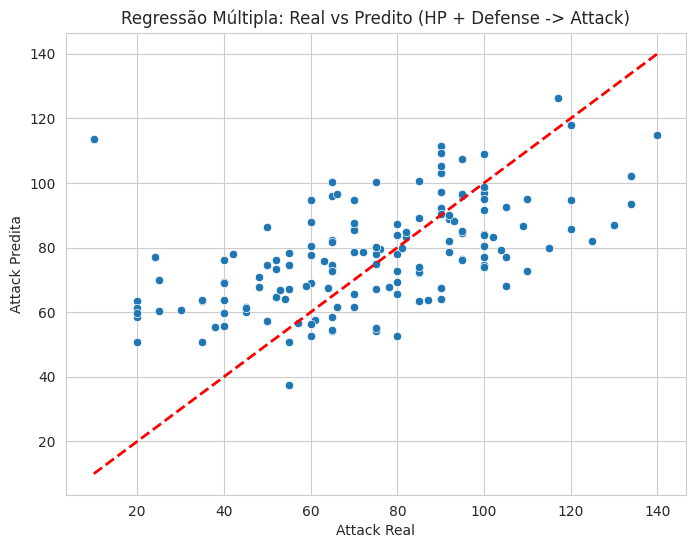

In [ ]:
# --- 2. Scikit-learn: Regressão Linear Múltipla ---
X_multi = df[['HP', 'Defense']]
y_multi = df['Attack']

X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

model_sk = LinearRegression()
model_sk.fit(X_train, y_train)
y_pred_multi = model_sk.predict(X_test)

print("\n=== Scikit-learn (Regressão Múltipla) ===")
print(f"Coeficientes: {model_sk.coef_}")
print(f"Intercepto: {model_sk.intercept_}")
print(f"R2 Score: {r2_score(y_test, y_pred_multi)}")

# Visualização Real vs Predito (Múltipla)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_multi)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Linha ideal
plt.xlabel('Attack Real')
plt.ylabel('Attack Predita')
plt.title('Regressão Múltipla: Real vs Predito (HP + Defense -> Attack)')


=== Scikit-learn (Regressão Múltipla) ===
Coeficientes: [0.44257661 0.07185273]
Intercepto: 40.86368826687486
R2 Score: 0.22295550340538073


Text(0.5, 1.0, 'Regressão Múltipla: Real vs Predito (HP + Defense -> Attack)')

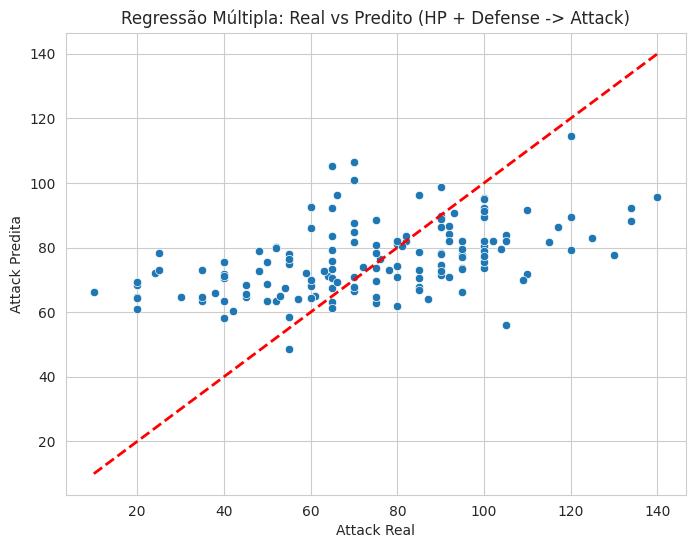

In [ ]:
# --- 2. Scikit-learn: Regressão Linear Múltipla ---
X_multi = df[['HP', 'Sp. Def']]
y_multi = df['Sp. Atk']

X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

model_sk = LinearRegression()
model_sk.fit(X_train, y_train)
y_pred_multi = model_sk.predict(X_test)

print("\n=== Scikit-learn (Regressão Múltipla) ===")
print(f"Coeficientes: {model_sk.coef_}")
print(f"Intercepto: {model_sk.intercept_}")
print(f"R2 Score: {r2_score(y_test, y_pred_multi)}")

# Visualização Real vs Predito (Múltipla)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_multi)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Linha ideal
plt.xlabel('Attack Real')
plt.ylabel('Attack Predita')
plt.title('Regressão Múltipla: Real vs Predito (HP + Defense -> Attack)')

**Analise** Isso comprova o que foi dito pelos defensores fisicos, se o pokemon tiver uma boa defesa ele podera suportar o ataque do glass cannon e como ele naturalmente tem uma ataque ou ataque especial forte ele tem chance de derrotar o pokemon adversario.

#Conclusão do trabalho

Com essas verificações foi possivel dizer que não, não é possivel predizer a tipagem de pokemon unicamente com seus status, pois os desenvolvedores não leva, em consideração unicamente seus staus, mas normalmente levam em consideração a sua inspiração de origem, cor, e habientação e com tudo isso indica o seu tipo e ai sim vem a "padronização" dos status, portanto é mais facil dizer o contrario, se souber o tipo do pokemon você tende a saber qual é o status mais forte dele.<br>
Em relaçao a outra hipotese, sim é possivel dizer se o pokémeon é lendario se levar em condição a soma de seus status,não somente a soma deles algo que é alto é por ser uma das cacteristicas que os lendarios tem,além de com a ajuda de número da pokedex, já que a pokedez é listada de acordo com a ordem de quando o jogador pode encontrar aquele pokemon e os lendarios normalmente são os ultimos a serem vistos,mais a geração ajudando a saber quantos pokemon naquela geração possuem statudos elevados para depois ir no finla da dex,ajudando nas etapas de previsão deixando menos alvos para serem classificados errados. Deixa muito mais fácil a a classificação do pokemons sendo lendario ou não.<br>

Em relação a correlações de tipagens é possivel ver que os status se corerlacionam para se ter dinamisnmo entre eles, mostrando que precisa se tem estrategia e equilibrio para se montar uma equipe não se pode focar unicamente em ataque e velocidade ,pois se não a equipe fica vulneravel caso o adversario resista ao ataque inicial. Por isso é sempre interresante se pensar nas relações das estatisticas dos pokémon quando for escolher um time

#Possíveis vieses

Daria para tentar melhora a predição do tipo, se ao inves de considerar unicamente o maior status considerar os 2 maiores, uma vez que se tem o padrão por exemplo de tipo eletrico ter speed e Sp. Atk altos, entretanto tem limitancia também pois existem outros tipos com essa carcteristica , como o tipo psiquico, além do fator dragão que possuem uma media de status alto podendno prejudiciar o modelo.

No caso das estatisticas poderia melhorar adicionando golpes ou o status em si dos pokemon em relaão ao seu nivel, pois esses dados no dataset são os status base, onde eles mostrar o pootencial do pokemon os status verdadeiros são misturados entre status base,IV e EV treinados pelo treinador, o que aumentará o fator de analise, mas asism podendo predizer se um pokémon  teria chance sde resistir a um ataque mesmo sendo considerado fraco em estatiscas defenseivas